In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.stats import zscore,pearsonr,ttest_1samp,ttest_ind,ttest_rel
from misc.cohensd import cohensd,cohens_d_onesample

pd.DataFrame.iteritems = pd.DataFrame.items
# Set the default plots style
sns.set_theme(style="white")

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.bottom'] = True
mpl.rcParams['axes.spines.left'] = True

# Set the default tick_params options for all axes
mpl.rcParams['xtick.bottom'] = True
mpl.rcParams['xtick.top'] = False
mpl.rcParams['xtick.direction'] = 'out'
mpl.rcParams['ytick.left'] = True
mpl.rcParams['ytick.right'] = False
mpl.rcParams['ytick.direction'] = 'out'

# Set default text color
plt.rcParams['text.color'] = 'black'

# Set default axes label color
plt.rcParams['axes.labelcolor'] = 'black'

# Set default x and y tick colors
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'


def p2sign(p):
    if  p<=0.001:
        sign='***'
    elif p<=0.01:
        sign='**'
    elif p<=0.05:
        sign='*'
    else:
        sign=''
    return sign

#### Info of subject number
- histgram of the subject number 
- histgram of the dropout subject number for each age
- histgram of the mean training number for each age

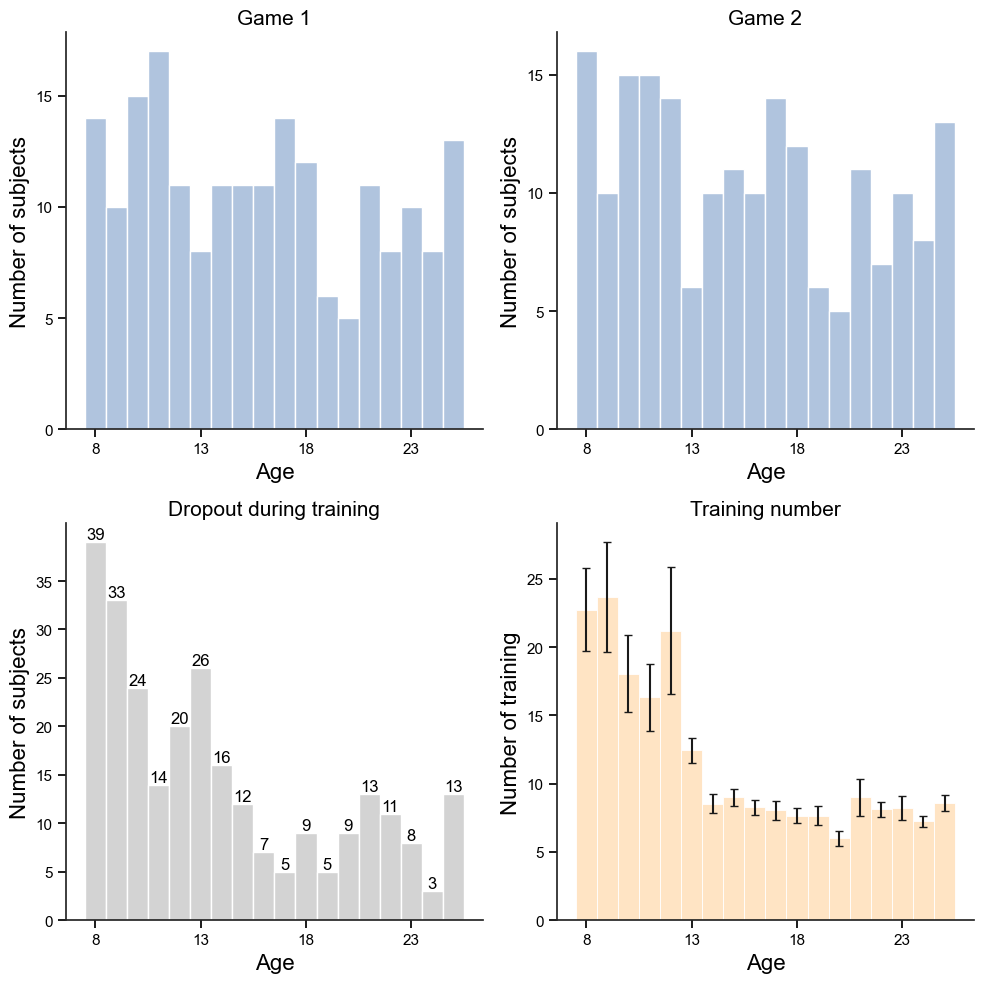

In [38]:
# Read data for game 1
participants_file = r'/mnt/workdir/DCM/BIDS/participants.tsv'
data_game1 = pd.read_csv(participants_file, sep='\t')

data_game1 = data_game1[data_game1['game1_fmri'] >= 0.5]
data_game1['training_acc'] = (data_game1['train_ap'] + data_game1['train_dp'])/2
data_game1 = data_game1.query('(training_acc>0.84)|(Age>12)')
#
# Read data for game 2
data_game2 = pd.read_csv(participants_file, sep='\t')
data_game2 = data_game2[data_game2['game2_fmri'] >= 0.5]

# Read dropout data
dropout_file = pd.read_excel(r"/mnt/workdir/DCM/Result/analysis/Online_training/participants_drop_out.xlsx")

# Read training data
training_file = pd.read_excel(r'/mnt/workdir/DCM/Result/analysis/Online_training/Valid information_203.xlsx')

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(10,10))
bar_width = 1
# Plot for game 1
ages_game1 = [group[0] for group in data_game1.groupby('Age')]
nums_game1 = [len(group[1]) for group in data_game1.groupby('Age')]

rects1 = axs[0, 0].bar(ages_game1, nums_game1,width=bar_width,color='lightsteelblue')
axs[0, 0].set_xlabel("Age", size=16)
axs[0, 0].set_ylabel("Number of subjects", size=16)
axs[0, 0].set_xticks(np.arange(min(ages_game1), max(ages_game1)+1, 5))  # Set x-ticks to appear every 5 years
axs[0, 0].set_yticks(np.arange(0, max(nums_game1)+1, 5))  # Set y-ticks to appear every 5 units
axs[0, 0].set_title("Game 1", size=15)
#axs[0, 0].bar_label(rects1, padding=3, size=14)

# Plot for game 2
ages_game2 = [group[0] for group in data_game2.groupby('Age')]
nums_game2 = [len(group[1]) for group in data_game2.groupby('Age')]

rects2 = axs[0, 1].bar(ages_game2, nums_game2,width=bar_width,color='lightsteelblue')
axs[0, 1].set_xlabel("Age", size=16)
axs[0, 1].set_ylabel("Number of subjects", size=16)
axs[0, 1].set_xticks(np.arange(min(ages_game2), max(ages_game2)+1, 5))  # Set x-ticks to appear every 5 years
axs[0, 1].set_yticks(np.arange(0, max(nums_game1)+1, 5))  # # Set y-ticks to be same as game 1
axs[0, 1].set_title("Game 2", size=15)
#axs[0, 1].bar_label(rects2, padding=3, size=14)

# Plot for dropout
ages_dropout = [group[0] for group in dropout_file.groupby('Age')]
nums_dropout = [len(group[1]) for group in dropout_file.groupby('Age')]

rects3 = axs[1, 0].bar(ages_dropout, nums_dropout,width=bar_width, color='lightgrey')
axs[1, 0].set_xlabel("Age", size=16)
axs[1, 0].set_ylabel("Number of subjects", size=16)
axs[1, 0].set_xticks(np.arange(min(ages_dropout), max(ages_dropout)+1, 5))
axs[1, 0].set_yticks(np.arange(0, max(nums_dropout), 5))
axs[1, 0].set_title("Dropout during training", size=15)
#axs[1, 0].bar_label(rects3, padding=3, size=14)
axs[1, 0].bar_label(rects3, fmt='{:,.0f}',size=12)

# Calculate the mean and se of total_counts for each age
mean_counts = training_file.groupby('Age')['Total_Counts'].mean()
se_counts = training_file.groupby('Age')['Total_Counts'].sem()

# Define the x positions for the bars
ages = mean_counts.index

# Plot the bar plot with error bars
axs[1, 1].bar(ages, mean_counts, yerr=se_counts, capsize=3,width=bar_width,linewidth=0.6, color='bisque')

# Set the x-axis limits, ticks, and labels
axs[1, 1].set_xticks([8,13,18,23])
axs[1, 1].set_xticklabels([8,13,18,23])

# Set the labels and title
axs[1, 1].set_xlabel("Age", size=16)
axs[1, 1].set_ylabel("Number of training", size=16)
axs[1, 1].set_title("Training number", size=15)

# Add tick lines to the bottom and left spines for all subplots
for ax in axs.flat:
    #ax.set_xticks(np.arange(min(training_file['Age']), max(training_file['Age'])+1, 5))
    ax.tick_params(axis='x', which='both', bottom=True, top=False, direction='out')
    ax.tick_params(axis='y', which='both', left=True, right=False, direction='out')

fig.tight_layout()

# Save the figure
# savepath = r'/mnt/workdir/DCM/Result/paper/sf/sf1/subjects_barplot.pdf'
# plt.savefig(savepath, bbox_inches='tight', pad_inches=0, dpi=300)
# plt.show()

267
472


[Text(0, 0, '55'),
 Text(0, 0, '45'),
 Text(0, 0, '40'),
 Text(0, 0, '32'),
 Text(0, 0, '34'),
 Text(0, 0, '35'),
 Text(0, 0, '27'),
 Text(0, 0, '23'),
 Text(0, 0, '18'),
 Text(0, 0, '19'),
 Text(0, 0, '21'),
 Text(0, 0, '11'),
 Text(0, 0, '14'),
 Text(0, 0, '24'),
 Text(0, 0, '19'),
 Text(0, 0, '18'),
 Text(0, 0, '11'),
 Text(0, 0, '26')]

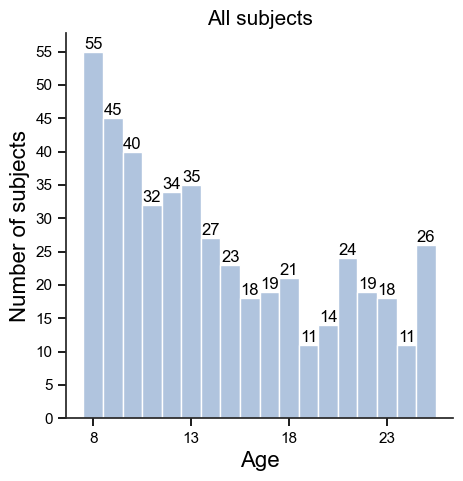

In [39]:
print(len(dropout_file))
dropout_file['Name'] = dropout_file['姓名']

all_subjects = pd.concat([dropout_file,training_file],ignore_index=True)
print(len(all_subjects))
fig, ax = plt.subplots(figsize=(5,5))
bar_width = 1
ages_all = [group[0] for group in all_subjects.groupby('Age')]
nums_all = [len(group[1]) for group in all_subjects.groupby('Age')]

rects = ax.bar(ages_all, nums_all,width=bar_width,color='lightsteelblue')
ax.set_xlabel("Age", size=16)
ax.set_ylabel("Number of subjects", size=16)
ax.set_xticks(np.arange(min(ages_all), max(ages_all)+1, 5))  # Set x-ticks to appear every 5 years
ax.set_yticks(np.arange(0, max(nums_all)+1, 5))  # # Set y-ticks to be same as game 1
ax.set_title("All subjects", size=15)
ax.bar_label(rects, fmt='{:,.0f}',size=12)

In [40]:
def quality_check(row):
    if ((row['Age'] >= 18) and (row['fd_mean'] > 0.2)) or ((row['Age'] < 18) and (row['fd_mean'] > 0.3)):
        return 'bad'
    else:
        return 'good'

# set task
tasks = ['game1','game2']
runs = [range(1,7), range(1,3)]

# specify subjects
participants_data = pd.read_csv('/mnt/workdir/DCM/BIDS/participants.tsv', sep='\t')
subs_hm = pd.DataFrame(columns=['sub_id', 'Age','task', 'run', 'fd_mean'])

#hd_metrics_template = r'/mnt/workdir/DCM/BIDS/derivatives/head_motion/raw_data/{}/func/{}_task-{}_run-{}_bold/metrics.txt'
hd_metrics_template = r'/mnt/workdir/DCM/BIDS/derivatives/head_motion/preprocessed_data/{}/func/{}_task-{}_run-{}_space-T1w_desc-preproc_bold_trimmed/metrics.txt'

for task,run_list in zip(tasks,runs):
    data = participants_data.query(f'{task}_fmri>=0.5')
    sub_list = data['Participant_ID'].to_list()
    sub_age = data['Age'].to_list()
    for sub, age in zip(sub_list, sub_age):
        sub_hd_metrics = []
        for run_id in run_list:
            #run_id = str(run_id).zfill(2)
            hd_metric_file = hd_metrics_template.format(sub, sub, task, run_id)
            hd_metrics = np.loadtxt(hd_metric_file)
            sub_hd_metrics.append(hd_metrics)
            mean_fd = np.round(np.mean(np.concatenate(sub_hd_metrics)),5)
            #mean_fd = np.round(np.mean(sub_hd_metrics),2)
            outlier = [f for f in hd_metrics if f> 0.5]
            subs_hm = pd.concat([subs_hm,
                      pd.DataFrame({'sub_id': [sub], 'Age': [age], 'task': [task], 'run': [run_id], 'fd_mean': [mean_fd],
                                    'outlier_num': [len(outlier)]})],axis=0)
subs_hm['quality'] = subs_hm.apply(quality_check, axis=1)
# subs_hm['Age'] = subs_hm['Age'].astype(float)
subs_hm.to_csv(r'/mnt/workdir/DCM/BIDS/derivatives/head_motion/preprocessed_data_rms.csv')

/tmp/ipykernel_204481/1930018847.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subs_task.dropna(inplace=True)
/tmp/ipykernel_204481/1930018847.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subs_task.dropna(inplace=True)


r = -0.549903859070929 p = 3.413408578620467e-97 for task = game1
r = -0.5247557698187975 p = 1.0693327502766738e-28 for task = game2


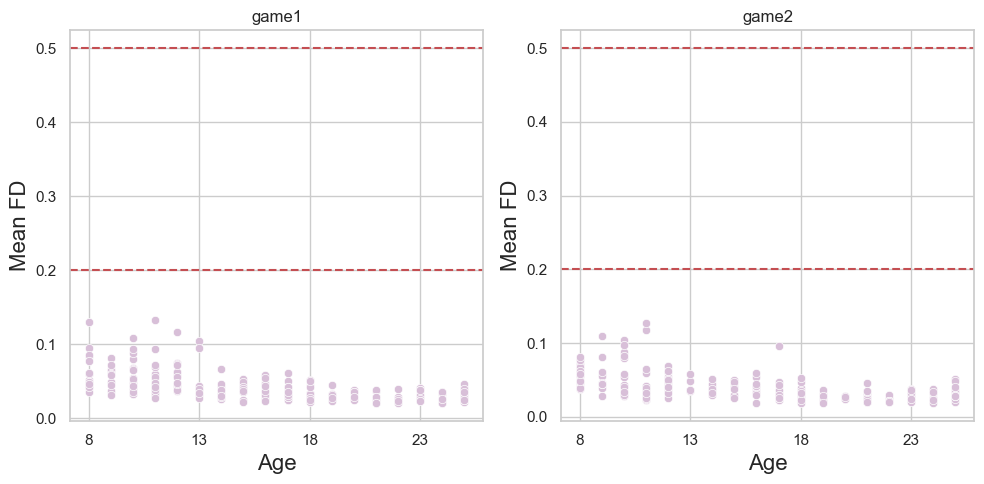

In [41]:
#subs_hm = pd.read_csv(r'/mnt/workdir/DCM/Result/analysis/quality_control/participants_data_quality.csv')
bad_subs = subs_hm.query('quality=="bad"')
#print(bad_subs)

# create a figure with 2 subplots
fig, axs = plt.subplots(1, 2, figsize=(10,5))

# list of unique tasks
#tasks = subs_hm['task'].unique()
tasks = ['game1','game2']

for i, task in enumerate(tasks):
    # subset the data for each task
    subs_task = subs_hm[subs_hm['task']==task]
    # drop the rows which contains nan
    subs_task.dropna(inplace=True)

    subs_task_fd_avg = subs_task.groupby("sub_id")['fd_mean'].mean()
    subs_task_age_avg = subs_task.groupby("sub_id")['Age'].mean()

    # create a scatterplot with regression for each task
    sns.scatterplot(x=subs_task_age_avg, y=subs_task_fd_avg, color='thistle', ax=axs[i]).set_title(task)

    # set labels for the axes
    #axs[i].set_ylim(0,0.3)
    axs[i].set_xlabel('Age', fontsize=16)
    axs[i].set_ylabel('Mean FD', fontsize=16)
    # Set the x-axis limits, ticks, and labels
    axs[i].set_xticks([8,13,18,23])
    axs[i].set_xticklabels([8,13,18,23])
    # calculate and print pearson correlation
    r, p = pearsonr(subs_task['Age'], subs_task['fd_mean'])
    print(f'r = {r} p = {p} for task = {task}')
    # add a horizontal line
    axs[i].axhline(y=0.2, color='r', linestyle='--')
    axs[i].axhline(y=0.5, color='r', linestyle='--')

# show the plot
plt.tight_layout()
# plt.savefig('/mnt/workdir/DCM/Result/paper/sf/sf1/age_fd_raw.pdf', bbox_inches='tight', pad_inches=0, dpi=300, transparent=True)
plt.show()

In [52]:
import numpy as np
import pandas as pd
fmriprep_rms = pd.read_csv(r'/mnt/workdir/DCM/BIDS/derivatives/fmriprep_volume_fmapless/fmriprep/sub-043/func/sub-043_task-game1_run-1_desc-confounds_timeseries_trimmed.tsv',sep='\t')['framewise_displacement'].to_list()
fmriprep_rms = np.nan_to_num(fmriprep_rms)
fsl_rms = np.loadtxt("/mnt/workdir/DCM/BIDS/derivatives/head_motion/raw_data/sub-043/func/sub-043_task-game1_run-01_bold/metrics.txt")
fsl_rms = np.nan_to_num(fsl_rms)[:161]

#### sample trials distribution

In [6]:
# Get subject's trial attribute
from analysis.mri.event.base import GAME1EV

class GAME1EV_trials_attribute(GAME1EV):
    def __init__(self, behDataPath):
        GAME1EV.__init__(self, behDataPath)

    def get_trial_attribute(self,phi):
        angle = self.behData['angles']
        pic1_ap = self.behData['pic1_ap']
        pic1_dp = self.behData['pic1_dp']

        pic2_ap = self.behData['pic2_ap']
        pic2_dp = self.behData['pic2_dp']
        
        distance = np.sqrt(self.behData['ap_diff'] ** 2 + self.behData['dp_diff'] ** 2)
        trials_info = pd.DataFrame({'pic1_ap':pic1_ap,'pic1_dp':pic1_dp,'pic2_ap':pic2_ap,'pic2_dp':pic2_dp,
                                    'angle':angle,'distance':distance})
        trial_label,_ = self.label_trial_corr()
        trial_rt = self.get_rt()
        # calculate the value
        value = []
        true_value = []
        for row in self.behData.itertuples():
            rule = row.fightRule
            if rule == '1A2D':
                v = row.pic1_ap - row.pic2_dp
                value.append(np.abs(v))
                true_value.append(v)
            elif rule == '1D2A':
                v = row.pic2_ap - row.pic1_dp
                value.append(np.abs(v))
                true_value.append(v)
        
        trials_info['trial_corr'] = [1 if t else 0 for t in trial_label]
        trials_info['RT'] = trial_rt
        trials_info['value'] = value
        trials_info['true_value'] = true_value

        # according to hexagonal effect and split distance into two types(align and misalign)
        # label alignment trials and misalignment trials according to the angle and Phi
        alignedD_360 = [(a-phi) % 360 for a in angle]
        anglebinNum = [round(a/30)+1 for a in alignedD_360]
        anglebinNum = [1 if a == 13 else a for a in anglebinNum]

        trials_alignment = []
        for binNum in anglebinNum:
            if binNum in range(1,13,2):
                trials_alignment.append(f'align')
            elif binNum in range(2,13,2):
                trials_alignment.append(f'misalign')
        trials_info['alignment'] = trials_alignment
        return trials_info

task = 'game1'
if task == 'game1':
    runs = range(1, 7)
    behav_template = '/mnt/workdir/DCM/sourcedata/sub_{}/Behaviour/' \
                     'fmri_task-game1/sub-{}_task-{}_run-{}.csv'
elif task == 'game2':
    runs = range(1, 3)
    behav_template = '/mnt/workdir/DCM/sourcedata/sub_{}/Behaviour/' \
                     'fmri_task-game2-test/sub-{}_task-{}_run-{}.csv'
else:
    raise Exception("You need specify a correct task name.")

participants_data = pd.read_csv('/mnt/workdir/DCM/BIDS/participants.tsv', sep='\t')
subjects = participants_data.query(f'{task}_fmri>=0.5')['Participant_ID'].str.split('-').str[-1].str.zfill(3)

phis_file = r'/mnt/data/DCM/result_backup/2023.5.14/Nilearn/game1/hexagon_spct/estPhi_ROI-EC_circmean_trial-all.csv'
phis_data = pd.read_csv(phis_file)

df = pd.DataFrame()
for subj in subjects:
    #print(f'----sub-{subj}----')
    phi = phis_data.query(f'(sub_id=="sub-{subj}")and(ifold=="6fold")')['Phi_mean'].values[0]
    for idx in runs:
        run_id = str(idx)
        behav_path = behav_template.format(subj, subj, task, run_id)
        game1ev = GAME1EV_trials_attribute(behav_path)
        trials_info = game1ev.get_trial_attribute(phi)
        trials_info['sub_id'] = 'sub-' + subj
        df = pd.concat([df,trials_info], axis=0)
df.to_csv('/mnt/workdir/DCM/Result/paper/sf/sf2/trials_attribute.csv',index=False)
print('Completed.')


KeyboardInterrupt



<ipython-input-48-153820a4a49b>:64: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  axs[1] = plt.subplot(1,2,2, projection='polar')


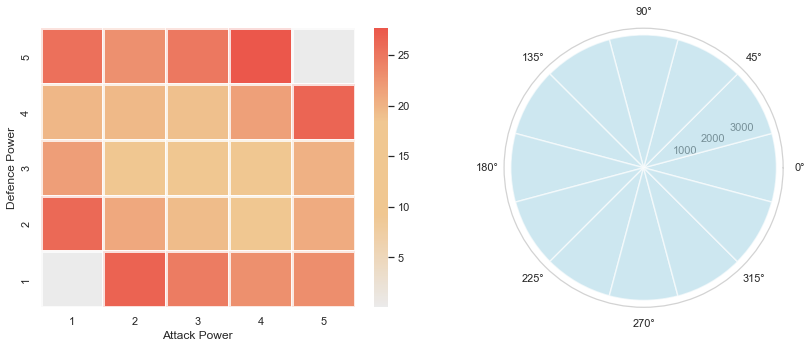

In [48]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

df = pd.read_csv('/mnt/workdir/DCM/Result/paper/sf/sf2/trials_attribute.csv')
#df = df[df['trial_corr']==1]
m1_pos_matrix = np.zeros((5,5))
m2_pos_matrix = np.zeros((5,5))

for row in df.itertuples():
    m1_pos_matrix[int(5-row.pic1_dp),int(row.pic1_ap-1)] +=1
    m2_pos_matrix[int(5-row.pic2_dp),int(row.pic2_ap-1)] +=1

pos_matrix = m1_pos_matrix + m2_pos_matrix

fig, axs = plt.subplots(1, 2, figsize=(12,5))
# define start and end color
start_color = [0.9, 0.9, 0.9]
middle_color1 = [0.9284313725490196, 0.7245098039215687, 0.46176470588235297]#'#f48c06'# white
middle_color2 = [0.9284313725490196, 0.7245098039215687, 0.46176470588235297]#[252/255, 90/255, 60/255] # light orange
end_color = [0.9019607843137255, 0.17647058823529413, 0.11764705882352941]#'#d00000'# red-orange

# Create a colormap with more color distinction
cmap = LinearSegmentedColormap.from_list("my_colormap", [start_color, middle_color1,middle_color2,end_color])


# plot heatmap for position matrix
sns.heatmap(pos_matrix/203, ax=axs[0],cmap=cmap,alpha=0.8,annot=False, fmt=".0f", annot_kws={"size": 12,"color": "black"},
            cbar_kws={'ticks': [0,5,10,15,20,25]},
            linecolor="white", linewidths=3)

# change x and y-axis labels
axs[0].set_xticklabels([1,2,3,4,5])
axs[0].set_yticklabels([5,4,3,2,1])
# Add x and y-axis titles
axs[0].set_xlabel("Attack Power")
axs[0].set_ylabel("Defence Power")

def angle2binNum(angles):
    alignedD_360 = [a % 360 for a in angles]
    anglebinNum = [round(a/30)+1 for a in alignedD_360]
    anglebinNum = [1 if binN == 13 else binN for binN in anglebinNum]

    # Compute pie slices
    N = int(360/30)
    theta = np.linspace(0, 2 * np.pi, N, endpoint=False)
    binsAngleNum = []
    for binNum in range(1,13):
        binAngleNum = 0
        for a in anglebinNum:
            if a == binNum:
                binAngleNum +=1
        binsAngleNum.append(binAngleNum)
    return binsAngleNum

angles = df['angle'].to_list()
# plot the distribution of the stalemate trials
binsAngleNum = angle2binNum(angles)
binsAngleNum = [b for b in binsAngleNum]
N = int(360/30)
theta = np.linspace(0, 2 * np.pi, N, endpoint=False)
width = 2*np.pi / (N)

# Polar plot
axs[1] = plt.subplot(1,2,2, projection='polar')
axs[1].bar(theta, binsAngleNum,width=width,bottom=0.0, alpha=0.6,linewidth=1.5,edgecolor='white',color='lightblue')
axs[1].set_yticks([1000,2000,3000])
axs[1].grid(alpha=0.6, color='white', lw=3)
# Change the color of the x-axis line
axs[1].spines['polar'].set_color('lightgrey')

plt.tight_layout()
plt.savefig('/mnt/workdir/DCM/Result/paper/sf/sf2/trials_sample/trials_sample_frequency.pdf',dpi=300,bbox_inches='tight',pad_inches=0,transparent=True)
plt.show()

### Distancne distribution between align vs misalign

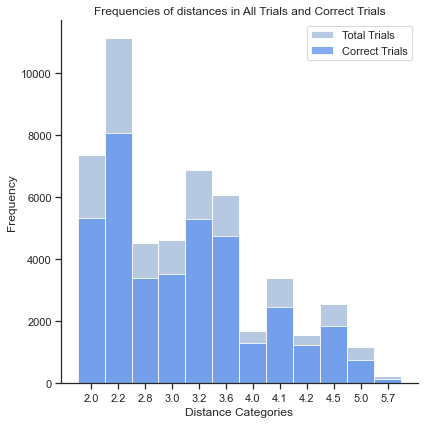

In [4]:
df = pd.read_csv('/mnt/workdir/DCM/Result/paper/sf/sf2/trials_attribute.csv')

# Ensure 'distance' is treated as a categorical variable
df['distance'] = df['distance'].round(1)
df['distance'] = df['distance'].astype(str)

# Get the unique categories and sort them
categories = sorted(df['distance'].unique())

# Count occurrences of each category for all trials and correct trials
all_counts = df['distance'].value_counts().sort_index()
correct_counts = df[df['trial_corr'] == 1]['distance'].value_counts().sort_index()

# Create an array for the positions of the bars on the x-axis
ind = np.arange(len(categories))

# Initialize the matplotlib figure
plt.figure(figsize=(6, 6))

# Width of the bars
width = 1

# Create bar plots
plt.bar(ind, all_counts, width, label='Total Trials', alpha=0.9, color='lightsteelblue')
plt.bar(ind, correct_counts, width, label='Correct Trials', alpha=0.8, color='cornflowerblue')

# Add a legend and informative axis label
plt.legend()
plt.ylabel("Frequency")
plt.title("Frequencies of distances in All Trials and Correct Trials")

# x-axis configurations
plt.xticks(ind, categories)
plt.xlabel("Distance Categories")

# Add tick lines to the bottom and left spines for all subplots
plt.tick_params(axis='x', which='both', bottom=True, top=False, direction='out')
plt.tick_params(axis='y', which='both', left=True, right=False, direction='out')


plt.tight_layout()
plt.savefig(r'/mnt/workdir/DCM/Result/paper/sf/sf3/distance_sample_distribution.pdf',dpi=300,bbox_inches='tight',pad_inches=0,transparent=True)
# Show the plot
plt.show()

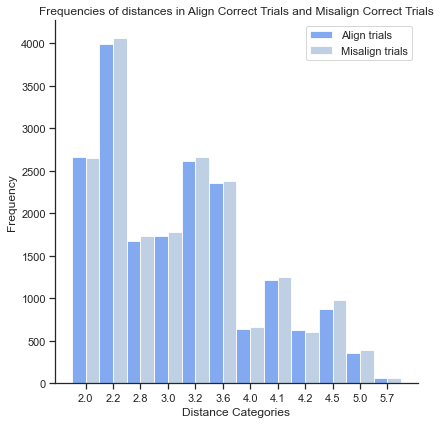

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the csv
df = pd.read_csv('/mnt/workdir/DCM/Result/paper/sf/sf2/trials_attribute.csv')

# Ensure 'distance' is treated as a categorical variable
df['distance'] = df['distance'].round(1)
df['distance'] = df['distance'].astype(str)

# Get the unique categories and sort them
categories = sorted(df['distance'].unique())

# Count occurrences of each category for align and misalign correct trials
align_counts = df[(df['trial_corr'] == 1) & (df['alignment'] == 'align')]['distance'].value_counts().sort_index()
misalign_counts = df[(df['trial_corr'] == 1) & (df['alignment'] == 'misalign')]['distance'].value_counts().sort_index()

# Create an array for the positions of the bars on the x-axis
ind = np.arange(len(categories))

# Initialize the matplotlib figure
plt.figure(figsize=(6, 6))

# Width of the bars
width = 0.5

# Create bar plots
plt.bar(ind, align_counts, width, label='Align trials', alpha=0.8, color='cornflowerblue')
plt.bar(ind+width, misalign_counts, width, label='Misalign trials', alpha=0.8, color='lightsteelblue')

# Add a legend and informative axis label
plt.legend()
plt.ylabel("Frequency")
plt.title("Frequencies of distances in Align Correct Trials and Misalign Correct Trials")

# x-axis configurations
plt.xticks(ind + width / 2, categories)
plt.xlabel("Distance Categories")

# Add tick lines to the bottom and left spines for all subplots
plt.tick_params(axis='x', which='both', bottom=True, top=False, direction='out')
plt.tick_params(axis='y', which='both', left=True, right=False, direction='out')

plt.tight_layout()
plt.savefig(r'/mnt/workdir/DCM/Result/paper/sf/sf3/distance_sample_distribution_alignVSmisalign.pdf',dpi=300,bbox_inches='tight',pad_inches=0,transparent=True)

# Show the plot
plt.show()

### ROI analysis for distance effect

In [14]:
from nilearn import masking, image
from scipy.stats import ttest_1samp, pearsonr,ttest_ind
from matplotlib.ticker import MaxNLocator
from scipy.stats import zscore
import ptitprince as pt
from scipy.stats import stats


def p2sign(p):
    if  p<=0.001:
        sign='***'
    elif p<=0.01:
        sign='**'
    elif p<=0.05:
        sign='*'
    else:
        sign='n.s.'
    return sign


def apply_mask_and_get_activity(cmap_paths, mask):
    return np.mean(masking.apply_mask(cmap_paths, mask), axis=1)
 

def plot_mean_activity(subs_mean_activity, data, ax):
    sub_label = data['acc_binary']
    hp_act = [act for act,l in zip(subs_mean_activity,sub_label) if l==1]
    act_data = pd.DataFrame({'AS':pd.Series(subs_mean_activity),'HS':pd.Series(hp_act)}) # Create an offset column

    pt.RainCloud(data=act_data, orient='v',linewidth=0, palette=['lightgray','#cca3ff'],scale='area',width_viol=1,
                 bw=0.3,move=0.15,offset=0.05,ax=ax)

    # Create error bar
    ax.hlines(y=0, xmin=-1, xmax=1.5, color='dimgray',linestyle='--',linewidth=0.75)
    mean = np.mean(subs_mean_activity)
    se = stats.sem(subs_mean_activity)
    ax.errorbar(x=0.15, y=mean, yerr=se, color='black', fmt='d',capsize=6,capthick=1.3,markersize=3)
    mean = np.mean(hp_act)
    se = stats.sem(hp_act)
    ax.errorbar(x=1.15, y=mean, yerr=se, color='slateblue', fmt='d',capsize=6,capthick=1.3,markersize=4)

    # plot significant star
    t1, p1 = ttest_1samp(subs_mean_activity, 0)
    cd1 = cohens_d_onesample(subs_mean_activity, 0)
    print('All subjects: t:',round(t1,3),'p:',round(p1,3), "Cohen's d:",round(cd1,3))
    ax.text(0.1, 2.7, p2sign(p1),ha='center', va='bottom',weight='bold',size=20)
    t2, p2 = ttest_1samp(hp_act, 0)
    cd2 = cohens_d_onesample(hp_act, 0)
    print('HP subjects: t:',round(t2,3),'p:',round(p2,3), "Cohen's d:",round(cd2,3))
    ax.text(1.05, 2.7, p2sign(p2),ha='center', va='bottom',weight='bold',size=20)

    ax.set_xlim(-0.8,1.5)
    ax.set_ylim(-3,3)

    # Save statistics to a DataFrame
    stats_df = pd.DataFrame({
        'Group': ['AS', 'HS'],
        't': [round(t1,3), round(t2,3)],
        'p': [round(p1,3), round(p2,3)],
        "Cohen's d": [round(cd1,3), round(cd2,3)]
    })

    return stats_df


def plot_covariate_relationship(sub_data, covariate_name, activity_data, ax, roi_name,task):
    # Setup variables based on covariate
    if covariate_name == 'Age':
        color = '#e36570'
        covary_variable = sub_data['Age'].to_list()
        xlabel = 'Age'
        ticks = [8, 12, 16, 20, 24]

    elif covariate_name == 'Acc':
        color = '#F8A485'#'#F8B195'
        if task == 'game1':
            covary_variable = sub_data['game1_acc'].to_list()
        elif task == 'game2':
            covary_variable = sub_data['game2_test_acc'].to_list()
        xlabel = 'Inference performance'
        ticks = [0.4, 0.6, 0.8, 1.0]
    
    sns.scatterplot(x=covary_variable, y=activity_data, color=color, s=10, alpha=0.8, ax=ax)
    sns.regplot(x=covary_variable, y=activity_data, color=color, order=1, scatter=False,line_kws={'linewidth': 4}, ax=ax)
    ax.set_ylabel('Mean activity', fontsize=20)
    sns.despine(top=True, right=True)
    ax.spines['left'].set_linewidth(1)
    ax.spines['bottom'].set_linewidth(1)
    r, p = pearsonr(covary_variable, activity_data)
    print(roi_name, covariate_name, 'r:',round(r,3), 'p:',round(p,3))
    title = p2sign(p)
    ax.set_title(title, size=20, fontweight='bold')
    ax.tick_params(axis='x', which='both', bottom=True, top=False, direction='out')
    ax.tick_params(axis='y', which='both', left=True, right=False, direction='out')
    return round(r,3), round(p,3)


def multi_roi_analysis(query_condition, cmap_template, roi_names, rois, savepath):
    # specify subjects
    participants_tsv = r'/mnt/workdir/DCM/BIDS/participants.tsv'
    participants_data = pd.read_csv(participants_tsv, sep='\t')
    data = participants_data.query(query_condition)
    subjects = data['Participant_ID'].to_list()
    data['acc_binary'] = data['game1_acc'].apply(lambda x: 1 if x > 0.8 else 0)

    # set cmap
    sub_cmap_paths = [cmap_template.format(sub_id) for sub_id in subjects]

    # Compute mean activity
    # Apply masks and get activity for each ROI
    roi_activities = [apply_mask_and_get_activity(sub_cmap_paths, roi) for roi in rois]

    # Plotting
    fig, axes = plt.subplots(3, 5, figsize=(10,8))

    # Plot the mean activity for each ROI
    stats_df = pd.DataFrame()
    for i, (roi_name, roi_activity) in enumerate(zip(roi_names, roi_activities)):
        print(roi_name,':')
        roi_stats_df =  plot_mean_activity(roi_activity, data, axes[0, i])
        axes[0, i].yaxis.set_major_locator(MaxNLocator(nbins=4))
        if i > 0:
            axes[0, i].set_ylabel('')
        roi_stats_df['ROI'] = roi_name
        stats_df = pd.concat([stats_df, roi_stats_df], axis=0)
    # After concatenating all dataframes, rearrange the columns to make 'ROI' the first column
    cols = ['ROI']  + [col for col in stats_df if col != 'ROI']
    stats_df = stats_df[cols]

    # Plot the covariate relationship for each ROI with 'Age'
    corr_stats = pd.DataFrame()
    for i, (roi_name, roi_activity) in enumerate(zip(roi_names, roi_activities)):
        r, p = plot_covariate_relationship(data,'Age', roi_activity, axes[1, i], roi_name,'game1')
        if i > 0:
            axes[1, i].set_ylabel('')
        axes[1, i].set_xticks([8, 13, 18, 23])
        axes[1, i].yaxis.set_major_locator(MaxNLocator(nbins=4))
        roi_corr_stats = pd.DataFrame({'ROI':[roi_name],'Covariate':['Age'],'r':[r],'p':[p]})
        corr_stats = pd.concat([corr_stats,roi_corr_stats],axis=0)

    # Plot the covariate relationship for each ROI with 'Acc'
    for i, (roi_name, roi_activity) in enumerate(zip(roi_names, roi_activities)):
        r, p = plot_covariate_relationship(data,'Acc', roi_activity, axes[2, i], roi_name,'game1')
        if i > 0:
            axes[2, i].set_ylabel('')
        axes[2, i].set_xticks([0.5, 0.75, 1.0])
        axes[2, i].yaxis.set_major_locator(MaxNLocator(nbins=4))
        roi_corr_stats = pd.DataFrame({'ROI':[roi_name],'Covariate':['Acc'],'r':[r],'p':[p]})
        corr_stats = pd.concat([corr_stats,roi_corr_stats],axis=0)

    for i in range(3):
        for j in range(5):
            if i < 2:
                axes[i, j].set_xlabel('')

    # show the plot
    plt.tight_layout()
    plt.savefig(savepath, dpi=300, bbox_inches='tight', pad_inches=0, transparent=True)
    plt.show()
    
    savepath = savepath.replace('.pdf','_mean_effect_stats.csv')
    stats_df.to_csv(savepath,index=False)

    # Define the order
    roi_order = ['EC', 'mPFC', 'HC', 'LOFC', 'PCC']
    # Convert the ROI column to a categorical type with the specified order
    corr_stats['ROI'] = pd.Categorical(corr_stats['ROI'], categories=roi_order, ordered=True)
    # Sort by ROI
    corr_stats = corr_stats.sort_values('ROI')
    savepath = savepath.replace('_mean_effect_stats.csv','_corr_stats.csv')
    corr_stats.to_csv(savepath,index=False)

/home/dell/Software/anaconda3/lib/python3.8/site-packages/nilearn/image/image.py:1065: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(niimg, result, niimg.affine)
/tmp/ipykernel_320168/1718374492.py:104: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['acc_binary'] = data['game1_acc'].apply(lambda x: 1 if x > 0.8 else 0)


EC :
All subjects: t: 5.217 p: 0.0 Cohen's d: 0.366
HP subjects: t: 4.166 p: 0.0 Cohen's d: 0.481
mPFC :
All subjects: t: 2.976 p: 0.003 Cohen's d: 0.209
HP subjects: t: 1.536 p: 0.129 Cohen's d: 0.177
HC :
All subjects: t: 3.756 p: 0.0 Cohen's d: 0.264
HP subjects: t: 2.351 p: 0.021 Cohen's d: 0.271
LOFC :
All subjects: t: 6.107 p: 0.0 Cohen's d: 0.429
HP subjects: t: 4.172 p: 0.0 Cohen's d: 0.482
PCC :
All subjects: t: 3.1 p: 0.002 Cohen's d: 0.218
HP subjects: t: 0.316 p: 0.753 Cohen's d: 0.036


/tmp/ipykernel_320168/1718374492.py:36: DeprecationWarning: Please use `sem` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  se = stats.sem(subs_mean_activity)
/tmp/ipykernel_320168/1718374492.py:39: DeprecationWarning: Please use `sem` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  se = stats.sem(hp_act)
/tmp/ipykernel_320168/1718374492.py:36: DeprecationWarning: Please use `sem` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  se = stats.sem(subs_mean_activity)
/tmp/ipykernel_320168/1718374492.py:39: DeprecationWarning: Please use `sem` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  se = stats.sem(hp_act)
/tmp/ipykernel_320168/1718374492.py:36: DeprecationWarning: Please use `sem` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  se = stats.sem(subs_mean_activity)
/tmp/ipykernel_320168/1718374492.py:39:

EC Age r: -0.052 p: 0.461
mPFC Age r: -0.024 p: 0.729
HC Age r: -0.063 p: 0.371
LOFC Age r: -0.018 p: 0.804
PCC Age r: -0.191 p: 0.006
EC Acc r: 0.042 p: 0.55
mPFC Acc r: 0.068 p: 0.336
HC Acc r: -0.045 p: 0.526
LOFC Acc r: 0.114 p: 0.106
PCC Acc r: -0.203 p: 0.004


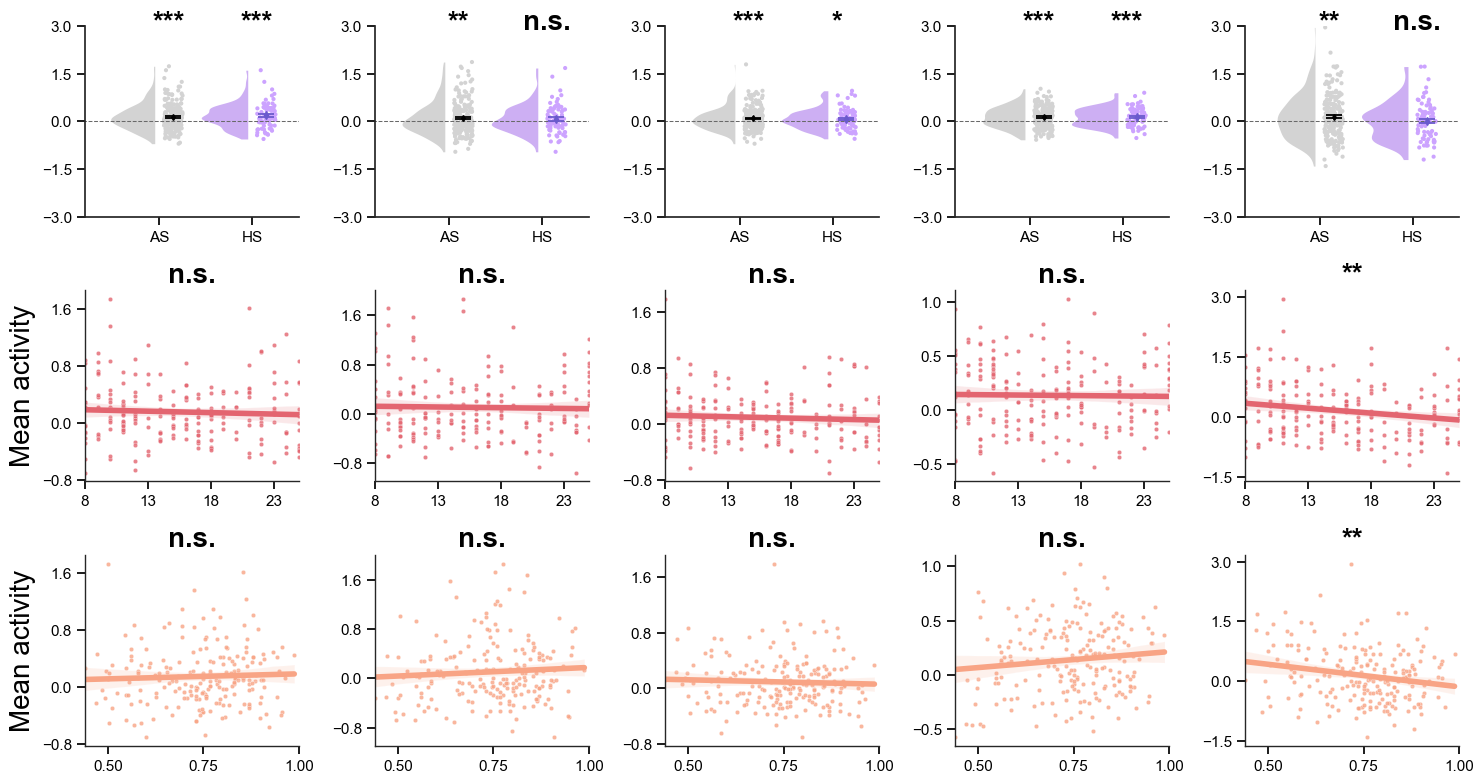

In [42]:
query_condition = 'game1_fmri>=0.5'
cmap_template = r'/mnt/data/DCM/result_backup/2023.5.14/Nilearn/game1/cv_train_hexagon_spct/Setall/6fold/{}/zmap/hexagon_zmap.nii.gz'
rois_names = ['EC','mPFC','HC','LOFC','PCC']

# load rois
lhc = image.load_img(r'/mnt/workdir/DCM/Docs/Mask/hippocampus/lHC_MNI152NL.nii.gz')
rhc = image.load_img(r'/mnt/workdir/DCM/Docs/Mask/hippocampus/rHC_MNI152NL.nii.gz')
hc = image.math_img('np.logical_or(img1,img2)', img1=lhc, img2=rhc)

ec  = image.load_img(r'/mnt/workdir/DCM/Docs/Mask/EC/juelich_EC_MNI152NL_prob.nii.gz')
ec = image.binarize_img(ec,5)

mPFC = image.load_img(r'/mnt/workdir/DCM/Docs/Mask/VMPFC/VMPFC_MNI152NL_new.nii.gz')

ofc1 = image.load_img(r'/mnt/workdir/DCM/Docs/Mask/aparc/mask/lh.lateralorbitofrontal.nii.gz') #parsorbitalis
ofc2 = image.load_img(r'/mnt/workdir/DCM/Docs/Mask/aparc/mask/rh.lateralorbitofrontal.nii.gz')
ofc = image.math_img('np.logical_or(img1,img2)', img1=ofc1, img2=ofc2)

pcc = image.load_img(r'/mnt/workdir/DCM/Docs/Mask/PCC/PCCk3_MNI152Nl_bin.nii.gz')
rois = [ec,mPFC,hc,ofc,pcc]
savepath = r'/mnt/workdir/DCM/Result/paper/sf/T3/hexagon(Ftest)_multi-ROIs_effect.pdf'
multi_roi_analysis(query_condition, cmap_template, rois_names, rois, savepath)

/home/dell/Software/anaconda3/lib/python3.8/site-packages/nilearn/image/image.py:1065: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(niimg, result, niimg.affine)
/tmp/ipykernel_571783/4186112791.py:104: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['acc_binary'] = data['game1_acc'].apply(lambda x: 1 if x > 0.8 else 0)


EC :
All subjects: t: 3.829 p: 0.0 Cohen's d: 0.276
HP subjects: t: 2.558 p: 0.013 Cohen's d: 0.299
mPFC :
All subjects: t: 2.517 p: 0.013 Cohen's d: 0.181
HP subjects: t: 1.324 p: 0.19 Cohen's d: 0.155
HC :
All subjects: t: 3.187 p: 0.002 Cohen's d: 0.229
HP subjects: t: 2.145 p: 0.035 Cohen's d: 0.251
LOFC :
All subjects: t: 3.295 p: 0.001 Cohen's d: 0.237
HP subjects: t: 2.406 p: 0.019 Cohen's d: 0.282
PCC :
All subjects: t: 3.152 p: 0.002 Cohen's d: 0.227
HP subjects: t: 2.444 p: 0.017 Cohen's d: 0.286


/tmp/ipykernel_571783/4186112791.py:36: DeprecationWarning: Please use `sem` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  se = stats.sem(subs_mean_activity)
/tmp/ipykernel_571783/4186112791.py:39: DeprecationWarning: Please use `sem` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  se = stats.sem(hp_act)
/tmp/ipykernel_571783/4186112791.py:36: DeprecationWarning: Please use `sem` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  se = stats.sem(subs_mean_activity)
/tmp/ipykernel_571783/4186112791.py:39: DeprecationWarning: Please use `sem` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  se = stats.sem(hp_act)
/tmp/ipykernel_571783/4186112791.py:36: DeprecationWarning: Please use `sem` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  se = stats.sem(subs_mean_activity)
/tmp/ipykernel_571783/4186112791.py:39:

EC Age r: -0.041 p: 0.572
mPFC Age r: -0.078 p: 0.281
HC Age r: -0.098 p: 0.174
LOFC Age r: -0.02 p: 0.779
PCC Age r: 0.044 p: 0.539
EC Acc r: -0.008 p: 0.91
mPFC Acc r: -0.002 p: 0.98
HC Acc r: -0.062 p: 0.391
LOFC Acc r: -0.026 p: 0.715
PCC Acc r: 0.013 p: 0.857


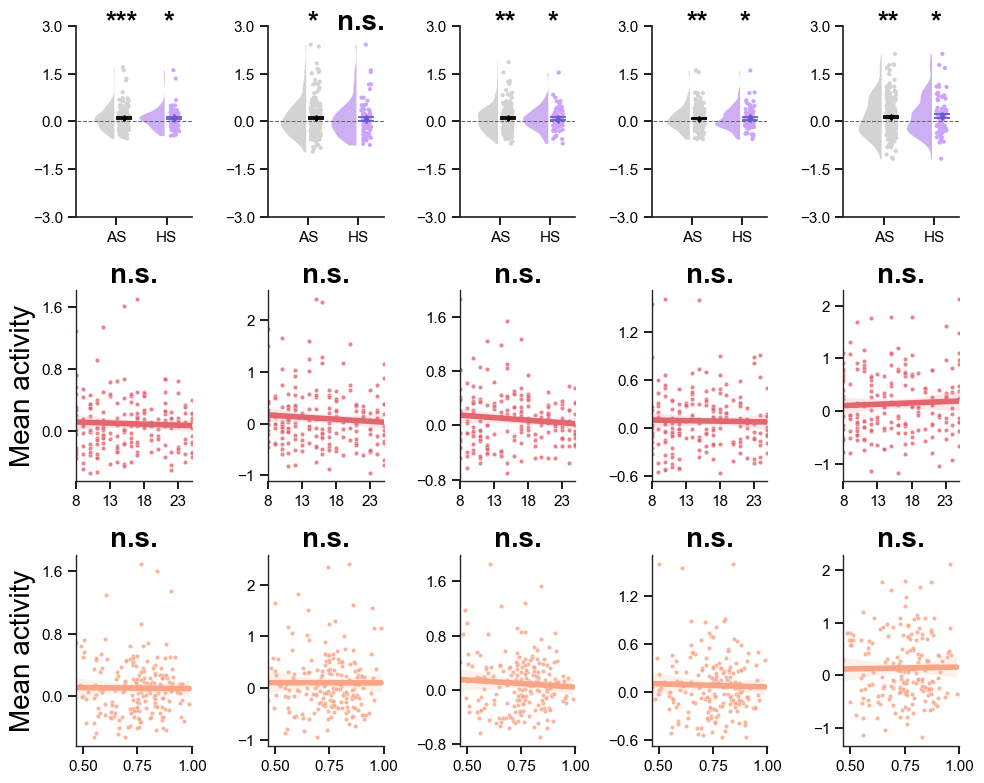

In [16]:
query_condition = 'game2_fmri>=0.5'
cmap_template = r'/mnt/data/DCM/result_backup/2023.5.14/Nilearn/game2/hexagon_spct/Setall/6fold/{}/zmap/hexagon_zmap.nii.gz'
rois_names = ['EC', 'mPFC', 'HC', 'LOFC', 'PCC']

# load rois
lhc = image.load_img(r'/mnt/workdir/DCM/Docs/Mask/hippocampus/lHC_MNI152NL.nii.gz')
rhc = image.load_img(r'/mnt/workdir/DCM/Docs/Mask/hippocampus/rHC_MNI152NL.nii.gz')
hc = image.math_img('np.logical_or(img1,img2)', img1=lhc, img2=rhc)

ec = image.load_img(r'/mnt/workdir/DCM/Docs/Mask/EC/juelich_EC_MNI152NL_prob.nii.gz')
ec = image.binarize_img(ec, 5)

mPFC = image.load_img(r'/mnt/workdir/DCM/Docs/Mask/VMPFC/VMPFC_MNI152NL_new.nii.gz')

ofc1 = image.load_img(r'/mnt/workdir/DCM/Docs/Mask/aparc/mask/lh.lateralorbitofrontal.nii.gz')  #parsorbitalis
ofc2 = image.load_img(r'/mnt/workdir/DCM/Docs/Mask/aparc/mask/rh.lateralorbitofrontal.nii.gz')
ofc = image.math_img('np.logical_ocdr(img1,img2)', img1=ofc1, img2=ofc2)

pcc = image.load_img(r'/mnt/workdir/DCM/Docs/Mask/PCC/PCCk3_MNI152Nl_bin.nii.gz')
rois = [ec, mPFC, hc, ofc, pcc]
savepath = r'/mnt/workdir/DCM/Result/paper/sf/T3/Game2_hexagon(Ftest)_multi-ROIs_effect.pdf'
multi_roi_analysis(query_condition, cmap_template, rois_names, rois, savepath)

In [15]:
query_condition = 'game1_fmri>=0.5'
cmap_template = r'/mnt/data/DCM/result_backup/2023.5.14/Nilearn/game1/distance_spct/Setall/6fold/{}/zmap/distance_zmap.nii.gz'
rois_names = ['EC','mPFC','HC','LOFC','PCC']

# load rois
lhc = image.load_img(r'/mnt/workdir/DCM/Docs/Mask/hippocampus/lHC_MNI152NL.nii.gz')
rhc = image.load_img(r'/mnt/workdir/DCM/Docs/Mask/hippocampus/rHC_MNI152NL.nii.gz')
hc = image.math_img('np.logical_or(img1,img2)', img1=lhc, img2=rhc)

ec  = image.load_img(r'/mnt/workdir/DCM/Docs/Mask/EC/juelich_EC_MNI152NL_prob.nii.gz')
ec = image.binarize_img(ec,5)

mPFC = image.load_img(r'/mnt/workdir/DCM/Docs/Mask/VMPFC/VMPFC_MNI152NL_new.nii.gz')

ofc1 = image.load_img(r'/mnt/workdir/DCM/Docs/Mask/aparc/mask/lh.lateralorbitofrontal.nii.gz') #parsorbitalis
ofc2 = image.load_img(r'/mnt/workdir/DCM/Docs/Mask/aparc/mask/rh.lateralorbitofrontal.nii.gz')
ofc = image.math_img('np.logical_or(img1,img2)', img1=ofc1, img2=ofc2)

pcc = image.load_img(r'/mnt/workdir/DCM/Docs/Mask/PCC/PCCk3_MNI152Nl_bin.nii.gz')

rois = [ec,mPFC,hc,ofc,pcc]
# savepath = r'/mnt/workdir/DCM/Result/paper/sf/sf3/distance_multi-ROIs_effect.pdf'
multi_roi_analysis(query_condition, cmap_template, rois_names, rois, savepath)

/home/dell/Software/anaconda3/lib/python3.8/site-packages/nilearn/image/image.py:1065: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(niimg, result, niimg.affine)
/tmp/ipykernel_571783/4186112791.py:104: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['acc_binary'] = data['game1_acc'].apply(lambda x: 1 if x > 0.8 else 0)


KeyboardInterrupt: 

### ROI analysis for distance effect(Align - misalign)

/home/dell/Software/anaconda3/lib/python3.8/site-packages/nilearn/image/image.py:1065: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(niimg, result, niimg.affine)
/tmp/ipykernel_320168/556349290.py:104: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['acc_binary'] = data['game1_acc'].apply(lambda x: 1 if x > 0.8 else 0)


EC :
All subjects: t: -0.19 p: 0.849 Cohen's d: -0.013
HP subjects: t: 1.599 p: 0.114 Cohen's d: 0.185
mPFC :
All subjects: t: 2.683 p: 0.008 Cohen's d: 0.188
HP subjects: t: 3.066 p: 0.003 Cohen's d: 0.354
HC :
All subjects: t: 0.562 p: 0.575 Cohen's d: 0.039
HP subjects: t: 1.165 p: 0.248 Cohen's d: 0.135
LOFC :
All subjects: t: 1.839 p: 0.067 Cohen's d: 0.129
HP subjects: t: 3.172 p: 0.002 Cohen's d: 0.366
PCC :
All subjects: t: 2.054 p: 0.041 Cohen's d: 0.144
HP subjects: t: 2.562 p: 0.012 Cohen's d: 0.296


/tmp/ipykernel_320168/556349290.py:36: DeprecationWarning: Please use `sem` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  se = stats.sem(subs_mean_activity)
/tmp/ipykernel_320168/556349290.py:39: DeprecationWarning: Please use `sem` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  se = stats.sem(hp_act)
/tmp/ipykernel_320168/556349290.py:36: DeprecationWarning: Please use `sem` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  se = stats.sem(subs_mean_activity)
/tmp/ipykernel_320168/556349290.py:39: DeprecationWarning: Please use `sem` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  se = stats.sem(hp_act)
/tmp/ipykernel_320168/556349290.py:36: DeprecationWarning: Please use `sem` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  se = stats.sem(subs_mean_activity)
/tmp/ipykernel_320168/556349290.py:39: Depre

EC Age r: 0.17 p: 0.015
mPFC Age r: 0.22 p: 0.002
HC Age r: 0.138 p: 0.049
LOFC Age r: 0.187 p: 0.008
PCC Age r: 0.06 p: 0.393
EC Acc r: 0.132 p: 0.06
mPFC Acc r: 0.133 p: 0.058
HC Acc r: 0.099 p: 0.16
LOFC Acc r: 0.117 p: 0.095
PCC Acc r: 0.089 p: 0.205


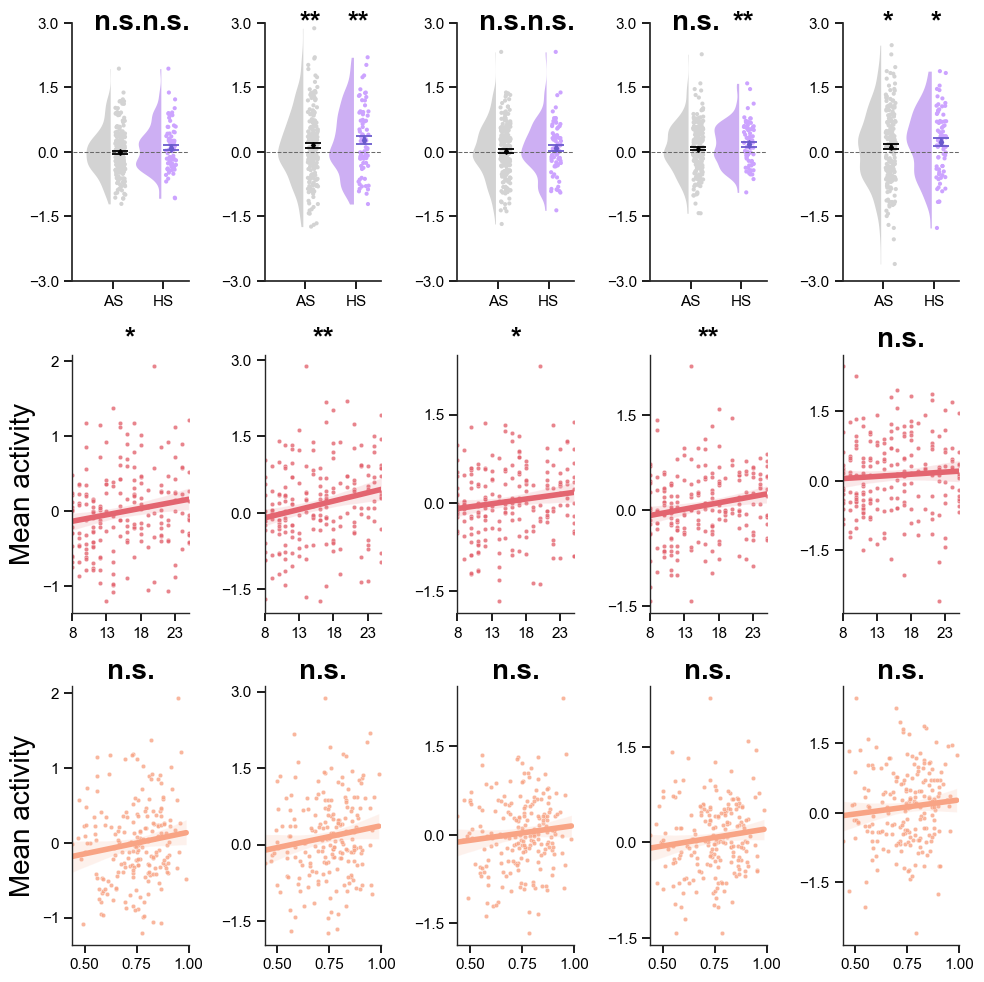

In [35]:
query_condition = 'game1_fmri>=0.5'
cmap_template = r'/mnt/data/DCM/result_backup/2023.5.14/Nilearn/game1/hexModdistance_spct/Setall/6fold/{}/zmap/hexModdistance_zmap.nii.gz'

rois_names = ['EC','mPFC','HC','LOFC','PCC']
# load rois
lhc = image.load_img(r'/mnt/workdir/DCM/Docs/Mask/hippocampus/lHC_MNI152NL.nii.gz')
rhc = image.load_img(r'/mnt/workdir/DCM/Docs/Mask/hippocampus/rHC_MNI152NL.nii.gz')
hc = image.math_img('np.logical_or(img1,img2)', img1=lhc, img2=rhc)

ec  = image.load_img(r'/mnt/workdir/DCM/Docs/Mask/EC/juelich_EC_MNI152NL_prob.nii.gz')
ec = image.binarize_img(ec,5)

mPFC = image.load_img(r'/mnt/workdir/DCM/Docs/Mask/VMPFC/VMPFC_MNI152NL_new.nii.gz')

ofc1 = image.load_img(r'/mnt/workdir/DCM/Docs/Mask/aparc/mask/lh.lateralorbitofrontal.nii.gz') #parsorbitalis
ofc2 = image.load_img(r'/mnt/workdir/DCM/Docs/Mask/aparc/mask/rh.lateralorbitofrontal.nii.gz')
ofc = image.math_img('np.logical_or(img1,img2)', img1=ofc1, img2=ofc2)

pcc = image.load_img(r'/mnt/workdir/DCM/Docs/Mask/PCC/PCCk3_MNI152Nl_bin.nii.gz')

rois = [ec,mPFC,hc,ofc,pcc]
savepath = r'/mnt/workdir/DCM/Result/paper/sf/sf3/hexModdistance_multi-ROIs_effect.pdf'
multi_roi_analysis(query_condition,cmap_template,rois_names,rois,savepath)

In [4]:
from nilearn import masking, image
from scipy.stats import ttest_1samp, pearsonr,ttest_ind
from matplotlib.ticker import MaxNLocator
import pingouin as pg
from matplotlib import gridspec
from scipy.stats import stats


def perform_mediation_analysis(data, x, m, y):
    # Z-score normalization for x, m, y variables
    data[[x, m, y]] = data[[x, m, y]].apply(zscore)
    mediation_results, indirect_effects = pg.mediation_analysis(data=data,
                                                                x=x, m=m, y=y, seed=42, n_boot=10000, return_dist=True)
    return mediation_results, indirect_effects


def plot_mediation_distribution(indirect_effects, mediation_results, ax, ci=0.95):
    p_value = mediation_results.loc[mediation_results['path'] == 'Indirect', 'pval'].values[0]
    lower = np.percentile(indirect_effects, (1 - ci) / 2 * 100)
    upper = np.percentile(indirect_effects, (1 + ci) / 2 * 100)
    n, bins, patches = ax.hist(indirect_effects, color='grey',bins=36)
    max_height = max(n)
    ax.axvline(x=0, ymin=0, ymax=max_height, color='black', linestyle='--')
    for i in range(len(patches)):
        if lower <= bins[i] < upper:
            patches[i].set_fc('#E5E1EC')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    med_title = p2sign(p_value)
    ax.set_title(med_title, size=20, fontweight='bold')


def multi_roi_analysis2(query_condition, cmap_template, roi_names, rois, savepath):
    # specify subjects
    participants_tsv = r'/mnt/workdir/DCM/BIDS/participants.tsv'
    participants_data = pd.read_csv(participants_tsv, sep='\t')
    data = participants_data.query(query_condition)
    subjects = data['Participant_ID'].to_list()
    data['acc_binary'] = data['game2_test_acc'].apply(lambda x: 1 if x > 0.8 else 0)

    # set cmap
    sub_cmap_paths = [cmap_template.format(sub_id) for sub_id in subjects]

    # Compute mean activity
    # Apply masks and get activity for each ROI
    roi_activities = [apply_mask_and_get_activity(sub_cmap_paths, roi) for roi in rois]

    # Plotting
    fig = plt.figure(figsize=(9,10))
    gs = gridspec.GridSpec(3, 6)
    gs.update(wspace=0.2, hspace=0.3)

    # Plot the mean activity for each ROI
    for i, (roi_name, roi_activity) in enumerate(zip(roi_names, roi_activities)):
        ax = plt.subplot(gs[0, i*2:i*2+2])
        plot_mean_activity(roi_activity, data, ax)
        ax.yaxis.set_major_locator(MaxNLocator(nbins=3))
        if i > 0:
            ax.set_ylabel('')
            ax.set_ylabel('')

    # Plot the covariate relationship for each ROI with 'Age'
    for i, (roi_name, roi_activity) in enumerate(zip(roi_names, roi_activities)):
        ax = plt.subplot(gs[1, i*2])
        plot_covariate_relationship(data,'Age', roi_activity, ax, roi_name,'game1')
        if i > 0:
            ax.set_ylabel('')
        ax.set_ylim([-2,2])
        ax.set_xticks([7,26])
        #ax.yaxis.set_major_locator(MaxNLocator(nbins=3))

    # Plot the covariate relationship for each ROI with 'Acc'
    for i, (roi_name, roi_activity) in enumerate(zip(roi_names, roi_activities)):
        ax = plt.subplot(gs[1, i*2+1])
        plot_covariate_relationship(data,'Acc', roi_activity, ax, roi_name,'game1')
        ax.set_ylabel('')
        ax.set_ylim([-2,2])
        ax.set_xticks([0.5, 1.0])
        #ax.yaxis.set_major_locator(MaxNLocator(nbins=3))

    # # loop through each ROI to perform mediation analysis:
    # roi_mediation_results = {}
    # roi_indirect_effects = {}
    # for i, (roi_name, roi_activity) in enumerate(zip(rois_names, roi_activities)):
    #     # Add the mean ROI activity to the data
    #     data[roi_name] = roi_activity
    #     mediation_results, indirect_effects = perform_mediation_analysis(data, 'Age', roi_name, 'game2_test_acc')
    #     roi_mediation_results[roi_name] = mediation_results
    #     roi_indirect_effects[roi_name] = indirect_effects


    # # Plot the mediation distribution for each ROI
    # for i, (roi_name, indirect_effects) in enumerate(roi_indirect_effects.items()):
    #     mediation_results = roi_mediation_results[roi_name]
    #     ax = plt.subplot(gs[2, i*2:i*2+2])
    #     plot_mediation_distribution(indirect_effects, mediation_results, ax)
    #     if i > 0:
    #         ax.set_ylabel('')
    #     ax.set_xlabel(roi_name, fontsize=20)
    #     ax.xaxis.set_major_locator(MaxNLocator(nbins=4))

    # Show the plot
    plt.tight_layout()
    #plt.savefig(savepath, dpi=300, bbox_inches='tight', pad_inches=0, transparent=True)
    plt.show()

### ROI analysis for value effect

/home/dell/Software/anaconda3/lib/python3.8/site-packages/nilearn/image/image.py:1065: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(niimg, result, niimg.affine)
/tmp/ipykernel_320168/1151086284.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['acc_binary'] = data['game1_acc'].apply(lambda x: 1 if x > 0.8 else 0)


EC :
All subjects: t: 3.143 p: 0.002 Cohen's d: 0.221
HP subjects: t: 1.634 p: 0.106 Cohen's d: 0.189
mPFC :
All subjects: t: 4.321 p: 0.0 Cohen's d: 0.303
HP subjects: t: 4.636 p: 0.0 Cohen's d: 0.535
HC :
All subjects: t: 4.533 p: 0.0 Cohen's d: 0.318
HP subjects: t: 3.768 p: 0.0 Cohen's d: 0.435


/tmp/ipykernel_320168/556349290.py:36: DeprecationWarning: Please use `sem` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  se = stats.sem(subs_mean_activity)
/tmp/ipykernel_320168/556349290.py:39: DeprecationWarning: Please use `sem` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  se = stats.sem(hp_act)
/tmp/ipykernel_320168/556349290.py:36: DeprecationWarning: Please use `sem` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  se = stats.sem(subs_mean_activity)
/tmp/ipykernel_320168/556349290.py:39: DeprecationWarning: Please use `sem` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  se = stats.sem(hp_act)
/tmp/ipykernel_320168/556349290.py:36: DeprecationWarning: Please use `sem` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  se = stats.sem(subs_mean_activity)
/tmp/ipykernel_320168/556349290.py:39: Depre

EC Age r: 0.103 p: 0.142
mPFC Age r: 0.273 p: 0.0
HC Age r: 0.222 p: 0.001
EC Acc r: 0.034 p: 0.627
mPFC Acc r: 0.241 p: 0.001
HC Acc r: 0.155 p: 0.027


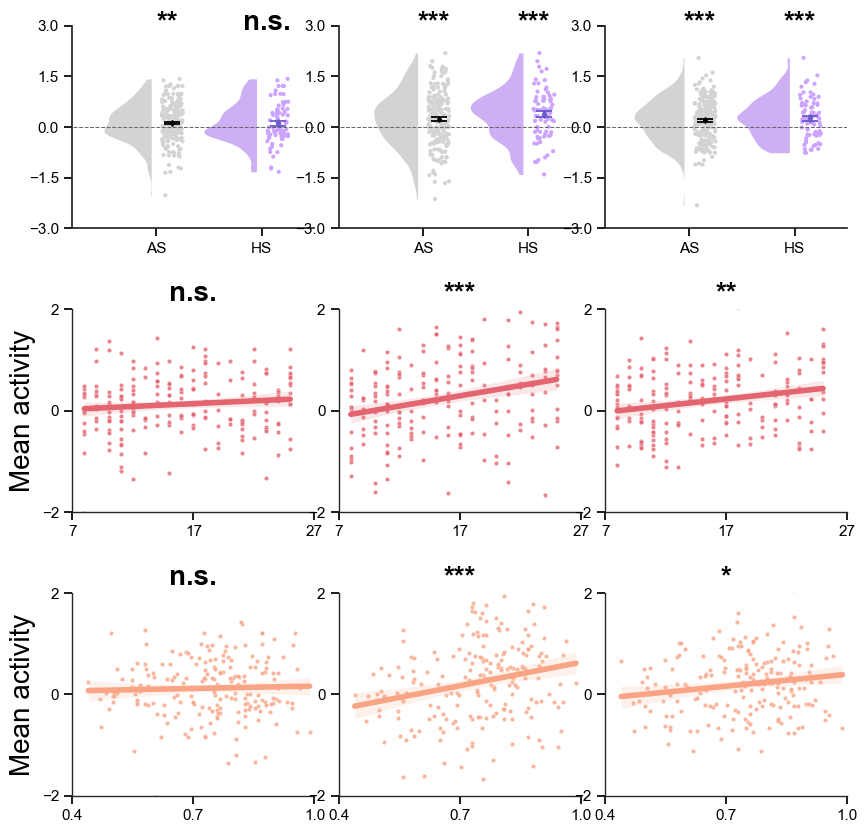

In [30]:
def multi_roi_analysis(query_condition, cmap_template, roi_names, rois, savepath):
    # specify subjects
    participants_tsv = r'/mnt/workdir/DCM/BIDS/participants.tsv'
    participants_data = pd.read_csv(participants_tsv, sep='\t')
    data = participants_data.query(query_condition)
    subjects = data['Participant_ID'].to_list()
    data['acc_binary'] = data['game1_acc'].apply(lambda x: 1 if x > 0.8 else 0)

    # set cmap
    sub_cmap_paths = [cmap_template.format(sub_id) for sub_id in subjects]

    # Compute mean activity
    # Apply masks and get activity for each ROI
    roi_activities = [apply_mask_and_get_activity(sub_cmap_paths, roi) for roi in rois]

    # Plotting
    fig, axes = plt.subplots(3, 3, figsize=(10,10))
    
    
    # Plot the mean activity for each ROI
    stats_df = pd.DataFrame()
    for i, (roi_name, roi_activity) in enumerate(zip(roi_names, roi_activities)):
        print(roi_name,':')
        roi_stats_df = plot_mean_activity(roi_activity, data, axes[0, i])
        axes[0, i].yaxis.set_major_locator(MaxNLocator(nbins=4))
        if i > 0:
            axes[0, i].set_ylabel('')
        roi_stats_df['ROI'] = roi_name
        stats_df = pd.concat([stats_df, roi_stats_df], axis=0)
    # After concatenating all dataframes, rearrange the columns to make 'ROI' the first column
    cols = ['ROI']  + [col for col in stats_df if col != 'ROI']
    stats_df = stats_df[cols]

    corr_stats = pd.DataFrame()
    # Plot the covariate relationship for each ROI with 'Age'
    for i, (roi_name, roi_activity) in enumerate(zip(roi_names, roi_activities)):
        r, p = plot_covariate_relationship(data,'Age', roi_activity, axes[1, i], roi_name,'game1')
        if i > 0:
            axes[1, i].set_ylabel('')
        axes[1, i].set_xticks([7, 17, 27])
        axes[1, i].set_ylim([-2, 2])
        axes[1, i].set_yticks([-2, 0, 2])
        roi_corr_stats = pd.DataFrame({'ROI':[roi_name],'Covariate':['Age'],'r':[r],'p':[p]})
        corr_stats = pd.concat([corr_stats,roi_corr_stats],axis=0)

    # Plot the covariate relationship for each ROI with 'Acc'
    for i, (roi_name, roi_activity) in enumerate(zip(roi_names, roi_activities)):
        r, p = plot_covariate_relationship(data,'Acc', roi_activity, axes[2, i], roi_name,'game1')
        if i > 0:
            axes[2, i].set_ylabel('')
        axes[2, i].set_xticks([0.4, 0.7, 1.0])
        axes[2, i].set_ylim([-2, 2])
        axes[2, i].set_yticks([-2, 0, 2])
        roi_corr_stats = pd.DataFrame({'ROI':[roi_name],'Covariate':['Acc'],'r':[r],'p':[p]})
        corr_stats = pd.concat([corr_stats,roi_corr_stats],axis=0)

    for i in range(3):
        for j in range(3):
            if i < 2:
                axes[i, j].set_xlabel('')

    # Show the plot
    plt.subplots_adjust(wspace=0.1,hspace=0.4)
    #plt.subplot_tool()
    #plt.savefig(savepath, dpi=300, bbox_inches='tight', pad_inches=0, transparent=True)
    plt.show()
    
    savepath = savepath.replace('.pdf','_mean_effect_stats.csv')
    stats_df.to_csv(savepath,index=False)

    # Define the order
    roi_order = ['EC', 'mPFC', 'HC', 'LOFC', 'PCC']
    # Convert the ROI column to a categorical type with the specified order
    corr_stats['ROI'] = pd.Categorical(corr_stats['ROI'], categories=roi_order, ordered=True)
    # Sort by ROI
    corr_stats = corr_stats.sort_values('ROI')

    savepath = savepath.replace('_mean_effect_stats.csv','_corr_stats.csv')
    corr_stats.to_csv(savepath,index=False)
    

query_condition = 'game1_fmri>=0.5'

# load rois
rois_names = ['EC','mPFC','HC']
lhc = image.load_img(r'/mnt/workdir/DCM/Docs/Mask/hippocampus/lHC_MNI152NL.nii.gz')
rhc = image.load_img(r'/mnt/workdir/DCM/Docs/Mask/hippocampus/rHC_MNI152NL.nii.gz')
hc = image.math_img('np.logical_or(img1,img2)', img1=lhc, img2=rhc)

ec  = image.load_img(r'/mnt/workdir/DCM/Docs/Mask/EC/juelich_EC_MNI152NL_prob.nii.gz')
ec = image.binarize_img(ec,5)

mPFC = image.load_img(r'/mnt/workdir/DCM/Docs/Mask/VMPFC/VMPFC_MNI152NL_new.nii.gz')
rois = [ec,mPFC,hc]

cmap_template = r'/mnt/data/DCM/result_backup/2023.5.14/Nilearn/game1/value_spct/Setall/6fold/{}/zmap/value_zmap.nii.gz'
savepath = r'/mnt/workdir/DCM/Result/paper/sf/sf4/Value_multi-ROIs_effect_type.pdf'
multi_roi_analysis(query_condition,cmap_template,rois_names,rois,savepath)

### Calculate the correlation distribution between distance modulation and value modulation

-0.0014192783700605052 0.06127179855500185


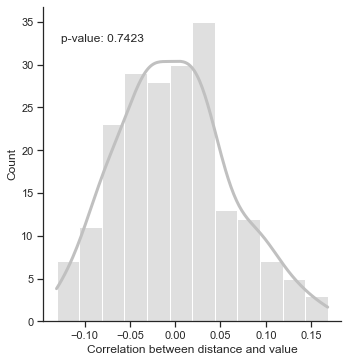

In [68]:
# specify subjects
participants_data = pd.read_csv('/mnt/workdir/DCM/BIDS/participants.tsv', sep='\t')
data = participants_data.query('game1_fmri>=0.5')
sub_list = data['Participant_ID'].to_list()

event1_tmp = r'/mnt/data/DCM/result_backup/2023.5.14/Events/game1/distance_spct/{}/6fold/{}_task-game1_run-{}_events.tsv'
event2_tmp = r'/mnt/data/DCM/result_backup/2023.5.14/Events/game1/value_spct/{}/6fold/{}_task-game1_run-{}_events.tsv'
corr_list = []
for sub in sub_list:
    mod1 = []
    mod2 = []
    for run_id in range(1,7):
        event1_path = event1_tmp.format(sub,sub,run_id)
        event2_path = event2_tmp.format(sub,sub,run_id)
        event1 = pd.read_csv(event1_path,sep='\t')
        event2 = pd.read_csv(event2_path,sep='\t')
        # corr = pearsonr(event1[event1['trial_type']=='distance']['modulation'].to_list(),
        #                  event2[event2['trial_type']=='value']['modulation'].to_list())[0]
        mod1.extend(event1[event1['trial_type'] == 'distance']['modulation'].to_list())
        mod2.extend(event2[event2['trial_type'] == 'value']['modulation'].to_list())
    corr = pearsonr(mod1,mod2)[0]
    corr_list.append(corr)

sns.displot(corr_list, color='silver',kde=True,facet_kws=dict(margin_titles=True),
            line_kws={'linewidth': 3, 'color': 'black'})

print(np.mean(corr_list),np.std(corr_list))
ttest_1samp(corr_list,0)
plt.xlabel("Correlation between distance and value")
plt.text(0.2, 0.9, f'p-value: {round(ttest_1samp(corr_list, 0)[1], 4)}', ha='center', va='center',
         transform=plt.gca().transAxes, fontsize=12)
plt.savefig(r'/mnt/workdir/DCM/Result/paper/sf/sf4/Value_distance_corr.pdf', dpi=300, bbox_inches='tight'
            , pad_inches=0, transparent=True)

### Interaction between distance and value

In [2]:
from nilearn import masking, image

# specify subjects
participants_tsv = r'/mnt/workdir/DCM/BIDS/participants.tsv'
participants_data = pd.read_csv(participants_tsv, sep='\t')
participants_data =  participants_data.query("(game1_fmri>=0.5)")
subjects_id = participants_data['Participant_ID'].to_list()

# set cmp template
m2_eucd_cmap = r'/mnt/workdir/DCM/BIDS/derivatives/Nilearn/game1/distance_value_spct_v1/Setall/6fold/{}/cmap/distance_cmap.nii.gz'
m2_value1_cmap = r'/mnt/workdir/DCM/BIDS/derivatives/Nilearn/game1/distance_value_spct_v1/Setall/6fold/{}/cmap/value1_cmap.nii.gz'
m2_value2_cmap = r'/mnt/workdir/DCM/BIDS/derivatives/Nilearn/game1/distance_value_spct_v1/Setall/6fold/{}/cmap/value2_cmap.nii.gz'

decision_eucd_cmap = r'/mnt/workdir/DCM/BIDS/derivatives/Nilearn/game1/distance_value_spct_v1/Setall/6fold/{}/cmap/decision_corrxdistance_cmap.nii.gz'
decision_value_cmap = r'/mnt/workdir/DCM/BIDS/derivatives/Nilearn/game1/distance_value_spct_v1/Setall/6fold/{}/cmap/value_cmap.nii.gz'

# set subjects cmap path
subs_m2_eucd = [m2_eucd_cmap.format(sub) for sub in subjects_id]
subs_m2_value1 = [m2_value1_cmap.format(sub) for sub in subjects_id]
subs_m2_value2 = [m2_value2_cmap.format(sub) for sub in subjects_id]
subs_decision_eucd = [decision_eucd_cmap.format(sub) for sub in subjects_id]
subs_decision_value = [decision_value_cmap.format(sub) for sub in subjects_id]

# set roi
#dmpfc = image.load_img(r'/mnt/workdir/DCM/Docs/Mask/dmPFC/dmPFC_closed_dilated_resampled.nii.gz')
#vmpfc = image.load_img(r'/mnt/workdir/DCM/Docs/Mask/VMPFC/vmPFC_bin.nii.gz')
#mpfc = image.load_img(r'/mnt/workdir/DCM/Docs/Mask/VMPFC/BN_mPFC.nii.gz')
mpfc = image.load_img(r'/mnt/workdir/DCM/Docs/Mask/VMPFC/VMPFC_MNI152NL_new.nii.gz')
# extract mean activity of ROI for each subjects
data = pd.DataFrame()
scenarios = [("mpfc", "m2"), ("mpfc", "decision")]
for roi_name, onset in scenarios:
    for effect in ['eucd','value']:
        roi = eval(roi_name)
        if (onset == 'm2')and(effect=='value'):
            subs_cmap1 = eval(f'subs_{onset}_{effect}1')
            subs_cmap2 = eval(f'subs_{onset}_{effect}2')
            act1 = np.mean(masking.apply_mask(subs_cmap1, roi), axis=1)
            act2 = np.mean(masking.apply_mask(subs_cmap2, roi), axis=1)
            act = np.mean([act1,act2],axis=0)
        else:
            subs_cmap = eval(f'subs_{onset}_{effect}')
            act = np.mean(masking.apply_mask(subs_cmap, roi), axis=1)
        data = pd.concat([data,pd.DataFrame({'sub':subjects_id,'act':act,'onset':onset,'effect':effect,'ROI':roi_name})])

In [11]:
for onset in ['m2','decision']:
    for effect in ['eucd','value']:
        mean = data.query(f"onset=='{onset}' & effect=='{effect}'")['act'].mean()
        se = data.query(f"onset=='{onset}' & effect=='{effect}'")['act'].sem()
        print("onset:",onset,"effect:",effect,"mean:",mean,"se:",se)

import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('act ~ C(onset) + C(effect) + C(onset):C(effect)', data=data).fit()
result = sm.stats.anova_lm(model, type=2)

# Print the result
print(result)

onset: m2 effect: eucd mean: 0.26195204999596555 se: 0.09193209896592981
onset: m2 effect: value mean: 0.14236718659480843 se: 0.02475704168210831
onset: decision effect: eucd mean: 0.1718445331083735 se: 0.08462798463458532
onset: decision effect: value mean: 0.36557073028871717 se: 0.0816245284137867


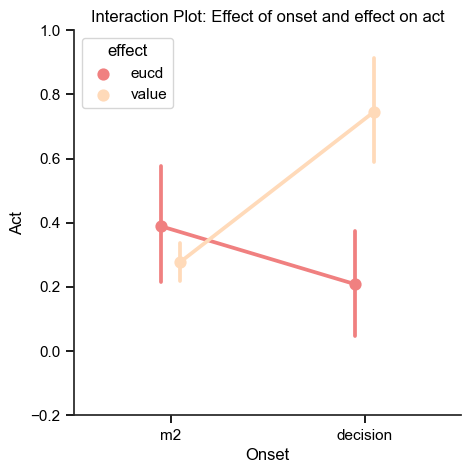

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt

colorp = ['#F08080','#FFDAB9']

# Create an interaction plot with error bars
plt.figure(figsize=(5, 5))
sns.pointplot(x='onset', y='act', hue='effect', data=data, errorbar='se', dodge=0.1, palette=colorp)

# Adding details to the plot
plt.title('Interaction Plot: Effect of onset and effect on act')
plt.xlabel('Onset')
plt.ylabel('Act')
plt.ylim(-0.2, 1)
plt.savefig(r'/mnt/workdir/DCM/Result/paper/sf/sf4/Value_distance_interaction_HP.pdf', dpi=300, bbox_inches='tight', pad_inches=0, transparent=True)
plt.show()

### ROI analysis for distance effect(Game2)

/home/dell/Software/anaconda3/lib/python3.8/site-packages/nilearn/image/image.py:1065: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(niimg, result, niimg.affine)
/tmp/ipykernel_320168/3605311309.py:104: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['acc_binary'] = data['game1_acc'].apply(lambda x: 1 if x > 0.8 else 0)


EC :
All subjects: t: 0.156 p: 0.876 Cohen's d: 0.011
HP subjects: t: 2.461 p: 0.016 Cohen's d: 0.288
mPFC :
All subjects: t: 6.843 p: 0.0 Cohen's d: 0.493
HP subjects: t: 9.376 p: 0.0 Cohen's d: 1.097
HC :
All subjects: t: 3.001 p: 0.003 Cohen's d: 0.216
HP subjects: t: 5.313 p: 0.0 Cohen's d: 0.622
LOFC :
All subjects: t: 3.52 p: 0.001 Cohen's d: 0.253
HP subjects: t: 4.827 p: 0.0 Cohen's d: 0.565
PCC :
All subjects: t: 1.005 p: 0.316 Cohen's d: 0.072
HP subjects: t: 2.483 p: 0.015 Cohen's d: 0.291


/tmp/ipykernel_320168/3605311309.py:36: DeprecationWarning: Please use `sem` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  se = stats.sem(subs_mean_activity)
/tmp/ipykernel_320168/3605311309.py:39: DeprecationWarning: Please use `sem` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  se = stats.sem(hp_act)
/tmp/ipykernel_320168/3605311309.py:36: DeprecationWarning: Please use `sem` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  se = stats.sem(subs_mean_activity)
/tmp/ipykernel_320168/3605311309.py:39: DeprecationWarning: Please use `sem` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  se = stats.sem(hp_act)
/tmp/ipykernel_320168/3605311309.py:36: DeprecationWarning: Please use `sem` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  se = stats.sem(subs_mean_activity)
/tmp/ipykernel_320168/3605311309.py:39:

EC Age r: 0.091 p: 0.206
mPFC Age r: 0.402 p: 0.0
HC Age r: 0.165 p: 0.022
LOFC Age r: 0.221 p: 0.002
PCC Age r: 0.105 p: 0.148
EC Acc r: 0.145 p: 0.044
mPFC Acc r: 0.45 p: 0.0
HC Acc r: 0.313 p: 0.0
LOFC Acc r: 0.232 p: 0.001
PCC Acc r: 0.142 p: 0.049


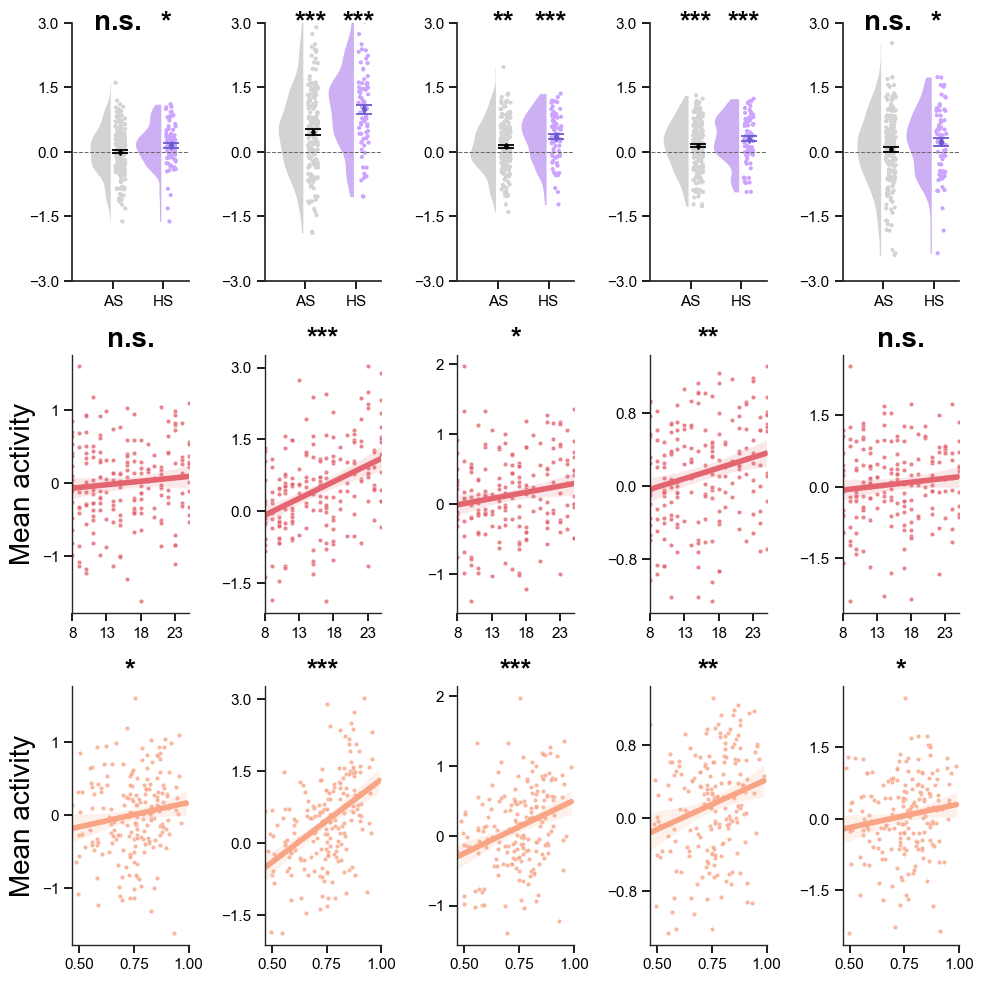

In [22]:
rois_names = ['EC','mPFC','HC','LOFC','PCC']

# load rois
lhc = image.load_img(r'/mnt/workdir/DCM/Docs/Mask/hippocampus/lHC_MNI152NL.nii.gz')
rhc = image.load_img(r'/mnt/workdir/DCM/Docs/Mask/hippocampus/rHC_MNI152NL.nii.gz')
hc = image.math_img('np.logical_or(img1,img2)', img1=lhc, img2=rhc)

ec  = image.load_img(r'/mnt/workdir/DCM/Docs/Mask/EC/juelich_EC_MNI152NL_prob.nii.gz')
ec = image.binarize_img(ec,5)

mPFC = image.load_img(r'/mnt/workdir/DCM/Docs/Mask/VMPFC/VMPFC_MNI152NL_new.nii.gz')

ofc1 = image.load_img(r'/mnt/workdir/DCM/Docs/Mask/aparc/mask/lh.lateralorbitofrontal.nii.gz') #parsorbitalis
ofc2 = image.load_img(r'/mnt/workdir/DCM/Docs/Mask/aparc/mask/rh.lateralorbitofrontal.nii.gz')
ofc = image.math_img('np.logical_or(img1,img2)', img1=ofc1, img2=ofc2)

pcc = image.load_img(r'/mnt/workdir/DCM/Docs/Mask/PCC/PCCk3_MNI152Nl_bin.nii.gz')

rois = [ec,mPFC,hc,ofc,pcc]
query_condition = 'game2_fmri>=0.5'
cmap_template = r'/mnt/data/DCM/result_backup/2023.5.14/Nilearn/game2/distance_spct/Setall/6fold/{}/zmap/distance_zmap.nii.gz'
savepath = r'/mnt/workdir/DCM/Result/paper/sf/sf5/Distance/Game2_distance_multi-ROIs_effect.pdf'

multi_roi_analysis(query_condition, cmap_template, rois_names, rois, savepath)

/tmp/ipykernel_320168/3605311309.py:104: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['acc_binary'] = data['game1_acc'].apply(lambda x: 1 if x > 0.8 else 0)


EC :
All subjects: t: 0.561 p: 0.576 Cohen's d: 0.04
HP subjects: t: 2.021 p: 0.047 Cohen's d: 0.237
mPFC :
All subjects: t: 5.549 p: 0.0 Cohen's d: 0.399
HP subjects: t: 7.139 p: 0.0 Cohen's d: 0.836
HC :
All subjects: t: 1.952 p: 0.052 Cohen's d: 0.141
HP subjects: t: 3.99 p: 0.0 Cohen's d: 0.467
LOFC :
All subjects: t: 2.434 p: 0.016 Cohen's d: 0.175
HP subjects: t: 4.038 p: 0.0 Cohen's d: 0.473
PCC :
All subjects: t: 0.988 p: 0.324 Cohen's d: 0.071
HP subjects: t: 2.981 p: 0.004 Cohen's d: 0.349


/tmp/ipykernel_320168/3605311309.py:36: DeprecationWarning: Please use `sem` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  se = stats.sem(subs_mean_activity)
/tmp/ipykernel_320168/3605311309.py:39: DeprecationWarning: Please use `sem` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  se = stats.sem(hp_act)
/tmp/ipykernel_320168/3605311309.py:36: DeprecationWarning: Please use `sem` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  se = stats.sem(subs_mean_activity)
/tmp/ipykernel_320168/3605311309.py:39: DeprecationWarning: Please use `sem` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  se = stats.sem(hp_act)
/tmp/ipykernel_320168/3605311309.py:36: DeprecationWarning: Please use `sem` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  se = stats.sem(subs_mean_activity)
/tmp/ipykernel_320168/3605311309.py:39:

EC Age r: 0.059 p: 0.413
mPFC Age r: 0.307 p: 0.0
HC Age r: 0.158 p: 0.028
LOFC Age r: 0.183 p: 0.011
PCC Age r: 0.146 p: 0.043
EC Acc r: 0.12 p: 0.095
mPFC Acc r: 0.375 p: 0.0
HC Acc r: 0.255 p: 0.0
LOFC Acc r: 0.255 p: 0.0
PCC Acc r: 0.182 p: 0.011


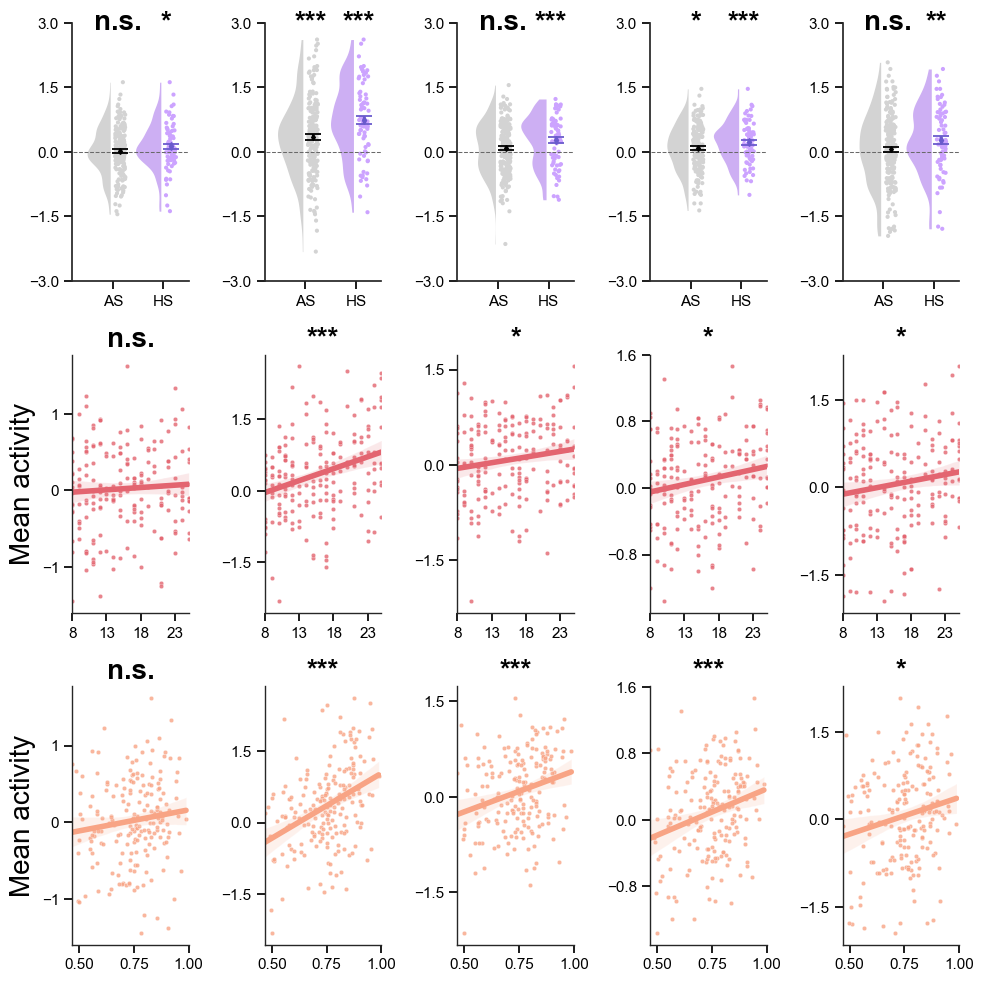

In [23]:
query_condition = 'game2_fmri>=0.5'
cmap_template = r'/mnt/workdir/DCM/BIDS/derivatives/Nilearn/game2/hexModdistance_spct/Setall/6fold/{}/zmap/hexModdistance_zmap.nii.gz'
savepath = r'/mnt/workdir/DCM/Result/paper/sf/sf5/Distance/Game2_HexModdistance_multi-ROIs_effect.pdf'
multi_roi_analysis(query_condition,cmap_template,rois_names,rois,savepath)

### Structural results of hippocampus

In [47]:
from sklearn.preprocessing import MinMaxScaler

metrics = pd.read_csv(r'/mnt/workdir/DCM/Result/analysis/brain_metrics_game1_20230914.csv')

metrics['mPFC.thickness'] = (metrics['lh.mPFC.thickness'] + metrics['rh.mPFC.thickness'])/2
metrics['EC.thickness'] = (metrics['lh.EC.thickness'] + metrics['rh.EC.thickness'])/2

In [ ]:
# Initialize a scaler
scaler = MinMaxScaler()

brain_measures = ['EC.thickness','mPFC.thickness']
beh_measures = ['Age','game1_acc']

# Initialize the plot
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10,5),sharey='row')

from matplotlib.ticker import MaxNLocator

for i, beh_measure in enumerate(beh_measures):
    for j, brain_measure in enumerate(brain_measures):
        # Compute pearson correlation
        r, p = pearsonr(metrics[brain_measure], metrics[beh_measure])
        print("Correlation between %s and %s" % (brain_measure, beh_measure))
        print('r', round(r,3), 'p', round(p,3))

        if 'EC' in brain_measure:
            color = '#F8B8A9'
            label= 'EC'
        elif 'mPFC' in brain_measure:
            color = '#D3C1E0'
            label= 'mPFC'

        sns.scatterplot(data=metrics, x=beh_measure, y=brain_measure, color=color, s=30, ax=axs[i])
        sns.regplot(data=metrics, x=beh_measure, y=brain_measure, color=color, order=1, scatter=False,line_kws={'linewidth': 5}, ax=axs[i],label=label)

        # Setup labels and despine
        axs[i].xaxis.set_major_locator(MaxNLocator(nbins=3))
        axs[i].yaxis.set_major_locator(MaxNLocator(nbins=3))

        axs[i].set_ylabel('Thickness (mm^2)', fontsize=15)

        title = p2sign(p)
        axs[i].set_title(title, size=20, fontweight='bold')
        axs[i].legend(loc='upper left', fontsize=10)

# Uncomment the lines below if you want to save the figure
fig.tight_layout()
savepath = '/mnt/workdir/DCM/Result/paper/figure6/corr_structural-thickness_behavior.pdf'
plt.savefig(savepath, bbox_inches='tight', pad_inches=0, dpi=300, transparent=True)

# show the plot
plt.show()

Correlation between HC.volume and Age
r 0.234 p 0.001
Correlation between HC.FA and Age
r 0.25 p 0.001
Correlation between HC.volume and game2_test_acc
r 0.301 p 0.0
Correlation between HC.FA and game2_test_acc
r 0.153 p 0.05


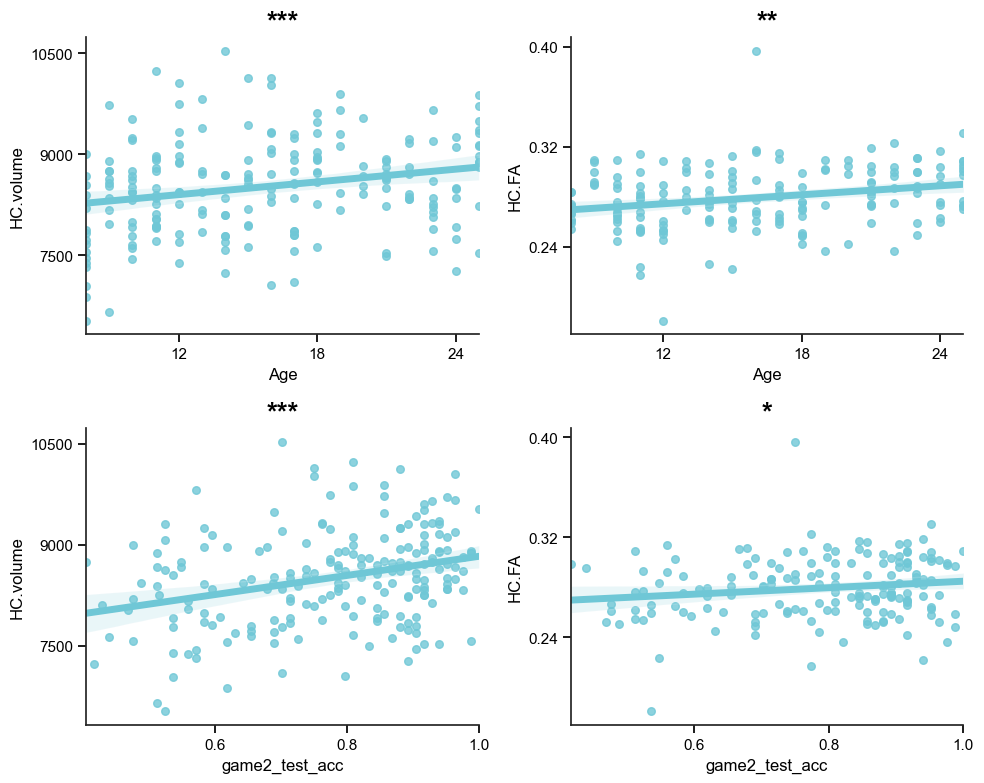

In [49]:
brain_measures = ['HC.volume', 'HC.FA']
beh_measures = ['Age','game2_test_acc']

# Initialize the plot
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10,8))

for i, beh_measure in enumerate(beh_measures):
    for j, brain_measure in enumerate(brain_measures):
        # Extract the relevant columns
        x = metrics[beh_measure]
        y = metrics[brain_measure]

        # Compute correlation handling NaN
        if ('FA' in brain_measure) or ('game2' in beh_measure):
            idx = np.isfinite(x) & np.isfinite(y)
            r, p = pearsonr(x[idx], y[idx])
        else:
            r, p = pearsonr(x, y)

        print("Correlation between %s and %s" % (brain_measure, beh_measure))
        print('r', round(r,3), 'p', round(p,3))

        #sns.scatterplot(data=metrics, x=beh_measure, y=brain_measure, color=color, s=20, ax=axs[i])
        color = '#6FC7D6'
        sns.regplot(data=metrics, x=beh_measure, y=brain_measure, color=color, order=1, scatter=True,line_kws={'linewidth': 5}, ax=axs[i][j],scatter_kws={'s':30})

        # Setup labels and despine
        axs[i][j].xaxis.set_major_locator(MaxNLocator(nbins=3))
        axs[i][j].yaxis.set_major_locator(MaxNLocator(nbins=3))

        #axs[i].set_ylabel('Mean volume (mm^3/NVoxel)', fontsize=15)
        title = p2sign(p)
        axs[i][j].set_title(title, size=20, fontweight='bold')

# Uncomment the lines below if you want to save the figure
fig.tight_layout()
savepath = '/mnt/workdir/DCM/Result/paper/figure6/corr_HC-structure_behavior_game2_acc.pdf'
plt.savefig(savepath, bbox_inches='tight', pad_inches=0, dpi=300, transparent=True)
 
# Show the plot
plt.show()